# Machine Learning Pipeline - Data Analysis

In the following notebooks, we will go through the implementation of each of the steps in the Machine Learning Pipeline. 

We will discuss:

1. **Data Analysis and Feature Engineering**
2. Feature Selection
3. Model Training
4. Obtaining Predictions / Scoring


We will use the house price dataset available on [Kaggle.com](https://www.kaggle.com/datasets/mazhar01/real-state-website-data). See below for more details.

===================================================================================================

## Predicting Price of Houses

The aim of the project is to build a machine learning model to predict the sale price of homes based on different explanatory variables describing aspects of residential houses.


### Why is this important? 

Predicting house prices is useful to identify fruitful investments or to determine whether the price advertised for a house is over or under-estimated.

### What is the objective of the machine learning model?

We aim to minimise the difference between the real price and the price estimated by our model. We will evaluate model performance with the:

1. mean squared error (mse)
2. root squared of the mean squared error (rmse)
3. r-squared (r2).

### How do I download the dataset?

- Visit the [Kaggle Website](https://www.kaggle.com/datasets/mazhar01/real-state-website-data).

- Remember to **log in**

- Scroll down to the bottom of the page, and click on the link **'train.csv'**, and then click the 'download' blue button towards the right of the screen, to download the dataset.

- The download the file called **'test.csv'** and save it in the directory with the notebooks.


**Note the following:**

-  You need to be logged in to Kaggle in order to download the datasets.
-  You need to accept the terms and conditions of the competition to download the dataset
-  If you save the file to the directory with the jupyter notebook, then you can run the code as it is written here.

### Let's go ahead and load the dataset.

In [1]:
# to handle datasets
import pandas as pd
import numpy as np
from datetime import datetime
from collections import Counter
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display

# for the yeo-johnson transformation
import scipy.stats as stats

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# to save the trained scaler class
import joblib

# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_columns', None)
#pd.pandas.set_option('display.max_rows', None)

In [2]:
# load dataset
data = pd.read_csv("../Data/data.csv", parse_dates = ['Built_in_year'])

# extract the year from the date column
data['Year'] = data['Built_in_year'].dt.year

# drop 'Built_in_year' column
data.drop(['Built_in_year'], axis = 1, inplace = True)

# rows and columns of the data
print(data.shape)

# visualise the dataset
data.head(5)

(14202, 57)


,Ids,Location1,Location2,Type,Bedrooms,Bathrooms,Size_in_SqYds,Price_in_millions,Parking_Spaces,Floors_in_Building,Elevators,Store_Rooms,Lobby_in_Building,Double_Glazed_Windows,Central_Air_Conditioning,Central_Heating,Waste_Disposal,Furnished,Service_Elevators_in_Building,Flooring,Electricity_Backup,Servant_Quarters,Study_Room,Prayer_Room,Powder_Room,Gym,Lounge_or_Sitting_Room,Laundry_Room,Business_Center_or_Media_Room_in_Building,Satellite_or_Cable_TV_Ready,Broadband_Internet_Access,Intercom,Conference_Room_in_Building,Community_Swimming_Pool,Community_Lawn_or_Garden,Community_Gym,Community_Center,First_Aid_or_Medical_Centre,Day_Care_center,Kids_Play_Area,Mosque,Barbeque_Area,Lawn_or_Garden,Swimming_Pool,Sauna,Jacuzzi,Nearby_Schools,Nearby_Hospital,Nearby_Shopping_Malls,Nearby_Restaurants,Nearby_Public_Transport_Service,Other_Nearby_Places,Security_Staff,Maintainance_Staff,Laundry_or_Dry_Cleaning_Facility,Facilities_for_Disabled,Year
0,0,"DHA Phase 6, DHA Defence",DHA Defence,House,6.0,6.0,600.0,220.0,3,NaN,NaN,NaN,0,1,1,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,1,"Saadi Town - Block 3, Saadi Town, Scheme 33",Scheme 33,House,6.0,6.0,240.0,38.5,1,NaN,NaN,NaN,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,2,"Bahria Town - Precinct 19, Bahria Town Karachi",Bahria Town Karachi,Flat,2.0,2.0,106.0,7.2,2,10.0,4.0,NaN,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2023.0
3,3,"Askari 5 - Sector J, Askari 5, Malir Cantonmen...",Cantt,House,5.0,5.0,375.0,72.5,4,NaN,NaN,NaN,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022.0
4,4,"Bahria Town - Precinct 35, Bahria Sports City,...",Bahria Town Karachi,House,4.0,4.0,350.0,21.1,1,NaN,NaN,NaN,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [3]:
# drop id, it is just a number given to identify each house
data.drop('Ids', axis = 1, inplace = True)

data.shape

(14202, 56)

In [4]:
# Using DataFrame.drop_duplicates() to keep first duplicate row
data = data.drop_duplicates(keep = 'first')
data.shape

(9820, 56)

In [5]:
#data.iloc[95:110]

The house price dataset contains 9820 rows, that is, houses, and 56 columns, i.e., variables.

54 are predictive variables and 1 is the target variable: 'Price_in_millions'

In [6]:
# #convert all float64 columns to int32
# float_cols = ['Bedrooms', 'Bathrooms', 'Size_in_SqYds', 'Floors_in_Building', 'Elevators', 'Store_Rooms', 'Year']
# data[float_cols] = data[float_cols].fillna(0).astype('int32')
# int64_cols = data.select_dtypes(include = ['int64']).columns
# data[int64_cols] = data[int64_cols].fillna(0).astype('int32')
# float64_cols = ['Price_in_millions']
# data[float64_cols] = data[float64_cols].fillna(0).astype('float32')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9820 entries, 0 to 14201
Data columns (total 56 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Location1                                  9820 non-null   object 
 1   Location2                                  9605 non-null   object 
 2   Type                                       9820 non-null   object 
 3   Bedrooms                                   9097 non-null   float64
 4   Bathrooms                                  8877 non-null   float64
 5   Size_in_SqYds                              9605 non-null   float64
 6   Price_in_millions                          9819 non-null   float64
 7   Parking_Spaces                             9820 non-null   int64  
 8   Floors_in_Building                         1309 non-null   float64
 9   Elevators                                  1191 non-null   float64
 10  Store_Rooms            

In [8]:
data['Location2'].nunique()

112

In [9]:
data.describe()

,Bedrooms,Bathrooms,Size_in_SqYds,Price_in_millions,Parking_Spaces,Floors_in_Building,Elevators,Store_Rooms,Lobby_in_Building,Double_Glazed_Windows,Central_Air_Conditioning,Central_Heating,Waste_Disposal,Furnished,Service_Elevators_in_Building,Flooring,Electricity_Backup,Servant_Quarters,Study_Room,Prayer_Room,Powder_Room,Gym,Lounge_or_Sitting_Room,Laundry_Room,Business_Center_or_Media_Room_in_Building,Satellite_or_Cable_TV_Ready,Broadband_Internet_Access,Intercom,Conference_Room_in_Building,Community_Swimming_Pool,Community_Lawn_or_Garden,Community_Gym,Community_Center,First_Aid_or_Medical_Centre,Day_Care_center,Kids_Play_Area,Mosque,Barbeque_Area,Lawn_or_Garden,Swimming_Pool,Sauna,Jacuzzi,Nearby_Schools,Nearby_Hospital,Nearby_Shopping_Malls,Nearby_Restaurants,Nearby_Public_Transport_Service,Other_Nearby_Places,Security_Staff,Maintainance_Staff,Laundry_or_Dry_Cleaning_Facility,Facilities_for_Disabled,Year
count,9097.000000,8877.000000,9605.000000,9819.000000,9820.000000,1309.000000,1191.000000,0.0,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,9820.000000,2368.000000
mean,3.750797,3.874282,260.460593,47.008266,1.511405,11.330787,2.519731,NaN,0.162831,0.246741,0.176680,0.165071,0.289919,0.141141,0.146436,0.725356,0.605295,0.236762,0.175866,0.114766,0.130041,0.095621,0.194399,0.063544,0.041752,0.138391,0.143992,0.061507,0.022811,0.029226,0.039409,0.030448,0.015682,0.032587,0.019043,0.033707,0.032688,0.017617,0.041955,0.029837,0.002648,0.002749,0.167210,0.168024,0.163544,0.142668,0.139104,0.094807,0.020265,0.017617,0.001426,0.003157,2018.147382
std,1.615532,1.569112,291.943629,57.944301,19.084377,10.059600,2.188835,NaN,0.369230,0.431137,0.381417,0.371264,0.453747,0.348184,0.353561,0.446357,0.488812,0.425116,0.380725,0.318755,0.336365,0.294086,0.395758,0.243951,0.200031,0.345328,0.351099,0.240270,0.149307,0.168448,0.194577,0.171825,0.124249,0.177561,0.136682,0.180482,0.177829,0.131562,0.200497,0.170146,0.051390,0.052366,0.373182,0.373907,0.369880,0.349752,0.346073,0.292962,0.140912,0.131562,0.037733,0.056100,7.258041
min,1.000000,1.000000,28.000000,0.690000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1980.000000
25%,3.000000,3.000000,120.000000,14.000000,0.000000,4.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000
50%,3.000000,4.000000,200.000000,27.000000,0.000000,8.000000,2.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2021.000000
75%,5.000000,5.000000,331.000000,63.5

## Drop Columns and Rows that have missing values

In [10]:
# to display all the columns of the dataframe in the notebook
pd.pandas.set_option('display.max_rows', None)
missing_data = pd.DataFrame(data.isnull().sum().sort_values(ascending = False), columns = ['Count'])
missing_data['Percent'] = missing_data['Count'] / len(data) * 100
# ingnoring the count which is 0 and display the result which has missing data
missing_data = missing_data[missing_data['Count'] > 0]
missing_data

,Count,Percent
Store_Rooms,9820,100.000000
Elevators,8629,87.871690
Floors_in_Building,8511,86.670061
Year,7452,75.885947
Bathrooms,943,9.602851
Bedrooms,723,7.362525
Size_in_SqYds,215,2.189409
Location2,215,2.189409
Price_in_millions,1,0.010183


It's safe to drop one columns for now i.e. 'Store_Rooms' and 1 row in 'Price_in_millions'
- col 'Store_Rooms': It has no values at all so it's difficult to do guess work to fill missing values here
- col 'Price_in_millions': It has only 1 value which is missing, so drop this row

In [11]:
# drop columnns
data.drop(['Store_Rooms'], axis = 1, inplace = True)

# drop rows in col 'Price_in_millions' that have missing values
data.drop(data.loc[data['Price_in_millions'].isnull()].index, axis = 0, inplace = True)

# drop rows in col 'Floors_in_Building' that have wrong inputs
data.drop(data.loc[data['Floors_in_Building'] == 0].index, axis = 0, inplace = True)

## Drop Columns

* column 'Location1' and 'Location2' contains almost same type of so drop atleast one column.
* also column 'location2' has some missing values. So drop this column.

In [12]:
data.drop(['Location2'], axis = 1, inplace = True)

In [13]:
#Columns with missing values
missing_data.index #indices here are the columns in the data

Index(['Store_Rooms', 'Elevators', 'Floors_in_Building', 'Year', 'Bathrooms',
       'Bedrooms', 'Size_in_SqYds', 'Location2', 'Price_in_millions'],
      dtype='object')

## Analysis and Feature Engineering

**We will analyse and do some feature engineering on the following:**

1. The target variable
2. Explore Variable types (categorical, numerical and Time Related)
3. Explore Missing data
4. Impute Missing data
5. Convert Datatypes of Columns
6. Explore Numerical variables
    - Discrete
    - Continuous
        - Distributions
        - Transformations
7. Explore Categorical variables
    - Cardinality
    - Rare Labels
    - Special mappings
8. Feature Scaling
9. Save Scaler

## 1. Target

Let's begin by exploring the target distribution.

In [14]:
select_bins = widgets.IntSlider(value = 50, min = 0, max = 100, step = 1, description = 'Bins')
select_density = widgets.Checkbox(value = False, description = 'Density')

In [15]:
# histogran to evaluate target distribution
@widgets.interact(select_bins = select_bins, select_density = select_density)
def target_hist_widget(select_bins, select_density):
    data['Price_in_millions'].hist(bins = select_bins, density = select_density, figsize = (4, 2), color = 'green')
    plt.ylabel( 'Number of houses' )
    plt.xlabel( 'Price' )
    plt.show()

interactive(children=(IntSlider(value=50, description='Bins'), Checkbox(value=False, description='Density'), O…

We can see that the target is continuous, and the distribution is skewed towards the right.

We can improve the value spread with a mathematical transformation.

#### Target Transformation
- Logarithmic Transformation

In [16]:
# let's transform the target using the logarithm
# histogran to evaluate target distribution
@widgets.interact(select_bins = select_bins, select_density = select_density)
def target_hist_widget(select_bins, select_density):
    np.log(data['Price_in_millions']).hist(bins = select_bins, density = select_density, figsize = (4, 2), color = 'green')
    plt.ylabel( 'Number of houses' )
    plt.xlabel("Log of 'Price_in_millions'")
    plt.show()

interactive(children=(IntSlider(value=50, description='Bins'), Checkbox(value=False, description='Density'), O…

Now the distribution looks more Gaussian.

#### Target Transformation
- yeo-johnson transformation

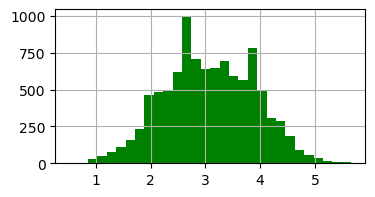

In [17]:
# Let's go ahead and analyse the distributions of the variables
# after applying a yeo-johnson transformation

# temporary copy of the data
yeojohnson_transformation = data.copy()

# transform the variable - yeo-johsnon
yeojohnson_transformation['Price_in_millions'], param = stats.yeojohnson(yeojohnson_transformation['Price_in_millions'])

# plot the histograms of the transformed variables
yeojohnson_transformation['Price_in_millions'].hist(bins = 30, figsize = (4, 2), color = 'green')
plt.show()

#### Target Transformation
- Reciprocal Transformation

In [18]:
import numpy as np

# Assume your data column is stored in 'data_column'
data_column = data['Price_in_millions']

# Apply reciprocal transformation
reciprocal_price = np.reciprocal(data_column)

# Print the transformed column
#print(reciprocal_price)

# let's transform the target using the Reciprocal Transformation
# histogran to evaluate target distribution
@widgets.interact(select_bins = select_bins, select_density = select_density)
def target_hist_widget(select_bins, select_density):
    reciprocal_price.hist(bins = select_bins, density = select_density, figsize = (4, 2), color = 'green')
    plt.ylabel( 'Number of houses' )
    plt.xlabel("reciprocal_price")
    plt.show()


interactive(children=(IntSlider(value=50, description='Bins'), Checkbox(value=False, description='Density'), O…

#### Target Transformation
- Box-Cox Transformation

In [19]:
import scipy.stats as stats
import numpy as np

# Assume your data column is stored in 'data_column'
data_column = data['Price_in_millions']

# Perform Box-Cox transformation
boxcox_price, lambda_val = stats.boxcox(data_column)

# Print the transformed data and lambda value
# print("Transformed data:", boxcox_price)
# print("Lambda value:", lambda_val)

# let's transform the target using the Box-Cox Transformation
# histogran to evaluate target distribution
@widgets.interact(select_bins = select_bins, select_density = select_density)
def target_hist_widget(select_bins, select_density):
    plt.figure(figsize = (4, 2))
    plt.hist(boxcox_price, bins = select_bins, density = select_density, color = 'green')
    plt.ylabel('Number of houses')
    plt.xlabel("box_cox_price")
    plt.show()


    
    figsize = (4, 2)

interactive(children=(IntSlider(value=50, description='Bins'), Checkbox(value=False, description='Density'), O…

#### Normality Check
- Logrithmic Transformation
- Yeo-Johnson Transformation
- Reciprocal Transformation
- Box-Cox Transformation

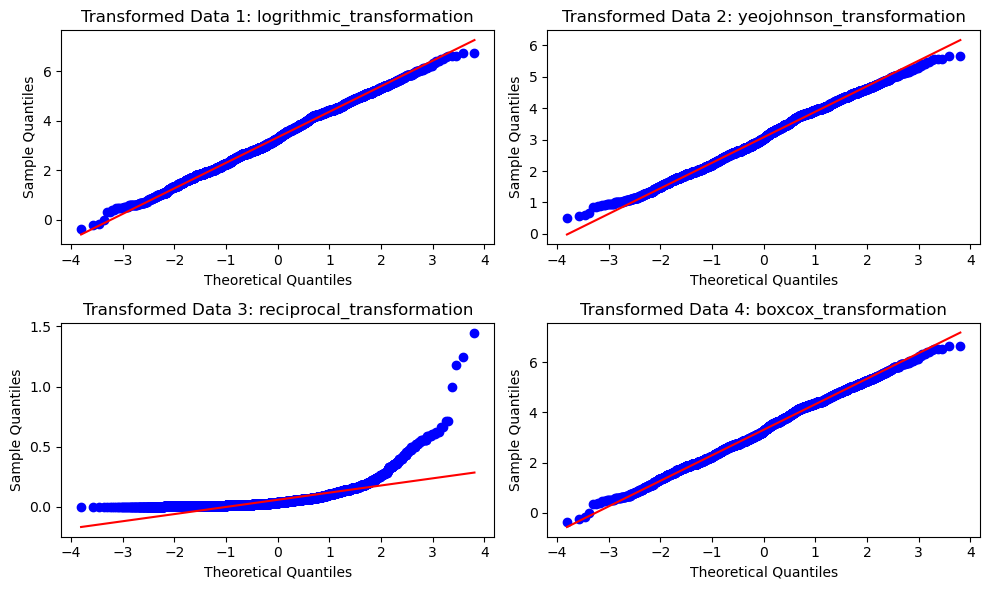

In [20]:
# Data
transformed_data = {'logrithmic_transformation': np.log(data['Price_in_millions']),
                    'yeojohnson_transformation': yeojohnson_transformation['Price_in_millions'],
                    'reciprocal_transformation': reciprocal_price,
                    'boxcox_transformation': boxcox_price}

# Create a figure with 2 subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 6))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Iterate over the transformed data and plot QQ plots
for i, (name, data_transformed) in enumerate(transformed_data.items()):
    # Create the QQ plot
    stats.probplot(data_transformed, dist = "norm", plot = axes[i])

    # Customize the plot
    axes[i].set_title("QQ Plot - Normality Check")
    axes[i].set_xlabel("Theoretical Quantiles")
    axes[i].set_ylabel("Sample Quantiles")
    axes[i].set_title(f"Transformed Data {i+1}: {name}")  # Add title indicating the transformed data name

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

* Looks like Logrithmic transformation, Yeo-Johnson transformation, and Box-Cox transformation are good choices.
* We will stick to Logrithmic transformation for now.

In [21]:
data['log_price'] = np.log(data['Price_in_millions'])

## 2. Explore Variable Types

Next, let's identify the categorical and numerical variables

### Categorical variables

Let's go ahead and find out what categorical variables we have in the dataset

In [22]:
# let's identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# number of categorical variables
len(cat_vars)

# cast all variables as categorical
# data[cat_vars] = data[cat_vars].astype('O')

print('Number of categorical variables: ', len(cat_vars))
print('-' * 35)
print('')

print('List of categorical variables: ', cat_vars)
print('-' * 53)
print('')

# visualise the categorical variables
data[cat_vars].head()

Number of categorical variables:  2
-----------------------------------

List of categorical variables:  ['Location1', 'Type']
-----------------------------------------------------



,Location1,Type
0,"DHA Phase 6, DHA Defence",House
1,"Saadi Town - Block 3, Saadi Town, Scheme 33",House
2,"Bahria Town - Precinct 19, Bahria Town Karachi",Flat
3,"Askari 5 - Sector J, Askari 5, Malir Cantonmen...",House
4,"Bahria Town - Precinct 35, Bahria Sports City,...",House


In [23]:
data.columns

Index(['Location1', 'Type', 'Bedrooms', 'Bathrooms', 'Size_in_SqYds',
       'Price_in_millions', 'Parking_Spaces', 'Floors_in_Building',
       'Elevators', 'Lobby_in_Building', 'Double_Glazed_Windows',
       'Central_Air_Conditioning', 'Central_Heating', 'Waste_Disposal',
       'Furnished', 'Service_Elevators_in_Building', 'Flooring',
       'Electricity_Backup', 'Servant_Quarters', 'Study_Room', 'Prayer_Room',
       'Powder_Room', 'Gym', 'Lounge_or_Sitting_Room', 'Laundry_Room',
       'Business_Center_or_Media_Room_in_Building',
       'Satellite_or_Cable_TV_Ready', 'Broadband_Internet_Access', 'Intercom',
       'Conference_Room_in_Building', 'Community_Swimming_Pool',
       'Community_Lawn_or_Garden', 'Community_Gym', 'Community_Center',
       'First_Aid_or_Medical_Centre', 'Day_Care_center', 'Kids_Play_Area',
       'Mosque', 'Barbeque_Area', 'Lawn_or_Garden', 'Swimming_Pool', 'Sauna',
       'Jacuzzi', 'Nearby_Schools', 'Nearby_Hospital', 'Nearby_Shopping_Malls',
       'N

### Numerical variables

In [24]:
# now let's identify the numerical variables
num_vars = [
    var for var in data.columns if var not in cat_vars and (var != 'Price_in_millions') and (var != 'log_price')
]

# number of numerical variables
len(num_vars)

print('Number of numerical variables: ', len(num_vars))
print('-' * 34)
print('')

print('List of numerical variables: ', num_vars)
print('-' * 130)
print('')

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  51
----------------------------------

List of numerical variables:  ['Bedrooms', 'Bathrooms', 'Size_in_SqYds', 'Parking_Spaces', 'Floors_in_Building', 'Elevators', 'Lobby_in_Building', 'Double_Glazed_Windows', 'Central_Air_Conditioning', 'Central_Heating', 'Waste_Disposal', 'Furnished', 'Service_Elevators_in_Building', 'Flooring', 'Electricity_Backup', 'Servant_Quarters', 'Study_Room', 'Prayer_Room', 'Powder_Room', 'Gym', 'Lounge_or_Sitting_Room', 'Laundry_Room', 'Business_Center_or_Media_Room_in_Building', 'Satellite_or_Cable_TV_Ready', 'Broadband_Internet_Access', 'Intercom', 'Conference_Room_in_Building', 'Community_Swimming_Pool', 'Community_Lawn_or_Garden', 'Community_Gym', 'Community_Center', 'First_Aid_or_Medical_Centre', 'Day_Care_center', 'Kids_Play_Area', 'Mosque', 'Barbeque_Area', 'Lawn_or_Garden', 'Swimming_Pool', 'Sauna', 'Jacuzzi', 'Nearby_Schools', 'Nearby_Hospital', 'Nearby_Shopping_Malls', 'Nearby_Restaurants', 'Nearby_Public_Transport_

,Bedrooms,Bathrooms,Size_in_SqYds,Parking_Spaces,Floors_in_Building,Elevators,Lobby_in_Building,Double_Glazed_Windows,Central_Air_Conditioning,Central_Heating,Waste_Disposal,Furnished,Service_Elevators_in_Building,Flooring,Electricity_Backup,Servant_Quarters,Study_Room,Prayer_Room,Powder_Room,Gym,Lounge_or_Sitting_Room,Laundry_Room,Business_Center_or_Media_Room_in_Building,Satellite_or_Cable_TV_Ready,Broadband_Internet_Access,Intercom,Conference_Room_in_Building,Community_Swimming_Pool,Community_Lawn_or_Garden,Community_Gym,Community_Center,First_Aid_or_Medical_Centre,Day_Care_center,Kids_Play_Area,Mosque,Barbeque_Area,Lawn_or_Garden,Swimming_Pool,Sauna,Jacuzzi,Nearby_Schools,Nearby_Hospital,Nearby_Shopping_Malls,Nearby_Restaurants,Nearby_Public_Transport_Service,Other_Nearby_Places,Security_Staff,Maintainance_Staff,Laundry_or_Dry_Cleaning_Facility,Facilities_for_Disabled,Year
0,6.0,6.0,600.0,3,NaN,NaN,0,1,1,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,6.0,6.0,240.0,1,NaN,NaN,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,2.0,2.0,106.0,2,10.0,4.0,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2023.0
3,5.0,5.0,375.0,4,NaN,NaN,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022.0
4,4.0,4.0,350.0,1,NaN,NaN,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


### 'Year'/Time Related variables

We have 1 'Year' variable in the dataset:

- Year: year in which the house was built

In [25]:
# list of variables that contain year information

year_vars = [var for var in num_vars if 'Yr' in var or 'Year' in var]

year_vars

['Year']

In [26]:
# let's explore the values of these year variables

for var in year_vars:
    print(var, data[var].unique())
    print()

Year [  nan 2023. 2022. 2000. 2021. 2025. 2027. 2018. 2017. 2019. 2020. 2015.
 2024. 2008. 2016. 2011. 2003. 2012. 2010. 2026. 2006. 2002. 1993. 2028.
 2014. 2005. 1995. 2009. 2004. 1980. 1999. 2007. 1998. 2013. 1990. 1996.
 2001. 1986. 1992. 1987. 1985. 1997. 1984.]



In [27]:
current_year = datetime.now().year
print(f'Current Year: {current_year}')
future_years = [i for i in data['Year'].unique().tolist() if i > current_year]    
(f'Future Years: {future_years}')

Current Year: 2023


'Future Years: [2025.0, 2027.0, 2024.0, 2026.0, 2028.0]'

- Interesting to note that there are some values in the 'Year' column that are greater than the current year
- Either they may be wrong inputs or House/Flats under construction and expected completion of year has been mentioned as 'Year'
- Mostly 'Flat' Type's are usually under construction which takes longer to build the project, let's explore 

In [28]:
for i in range(len(future_years)):
    df_fy = data.loc[data['Year'] == future_years[i]]
    print(f'Year: {int(future_years[i])}')
    print('----------')
    print(df_fy.groupby('Type').count()['Year'])
    print()

Year: 2025
----------
Type
Flat     83
House     7
Name: Year, dtype: int64

Year: 2027
----------
Type
Flat    17
Name: Year, dtype: int64

Year: 2024
----------
Type
Flat     38
House     7
Name: Year, dtype: int64

Year: 2026
----------
Type
Flat     31
House     2
Name: Year, dtype: int64

Year: 2028
----------
Type
Flat     13
House     2
Name: Year, dtype: int64



- As expected mostly they are 'Flat' Type's.
- As per Domain Knowledge of Real State Industry of Pakistan, how it works, we can either replace their 'Year' value with current year or leave as it is. 
- For simplicity we will keep them as they are. 

In [29]:
##Update the values in the 'Year' column
#data['Year'].loc[data['Year'] > current_year] = current_year

In [30]:
#data[data['Year'] > current_year]

### Relationship between 'Price' and 'Year'
We can now explore the evolution of the "Price_in_millions" with the years in which the house was built:

In [31]:
# # plot 'Price_in_millions' vs 'Year' in which it was built
# data.groupby('Year')['Price_in_millions'].median().plot()
# plt.ylabel('Median House Price')
# plt.show()

In [32]:
# Create a FloatRangeSlider for selecting years
year_slider = widgets.FloatRangeSlider(value = [data.Year.min(), data.Year.max()], min = data.Year.min(), max = data.Year.max(),
    step = 1, description = 'Years:', readout = True, readout_format = '.0f')

# Define a function to update the plot when the slider changes
@widgets.interact(year_range = year_slider)
def update_plot(year_range):
    # Filter the data based on the selected year range
    filtered_data = data[(data['Year'] >= year_range[0]) & (data['Year'] <= year_range[1])]
    # Calculate the median price for each year
    grouped_data = filtered_data.groupby('Year')['Price_in_millions'].median()
    # Plot the data
    plt.plot(grouped_data.index, grouped_data.values)
    plt.title('Median Price by Year')
    plt.xlabel('Year')
    plt.ylabel('Median Price (millions)')
    plt.show()

interactive(children=(FloatRangeSlider(value=(1980.0, 2028.0), description='Years:', max=2028.0, min=1980.0, r…

We see there is lot of fluctuation in value of houses. In the year 2007 prices were at the peak, as per above plot excluding missing values

In [33]:
#data.loc[data['Price_in_millions'].max()]

We can plot instead the time since house was built, or time since built, and price, to see if there is a relationship.

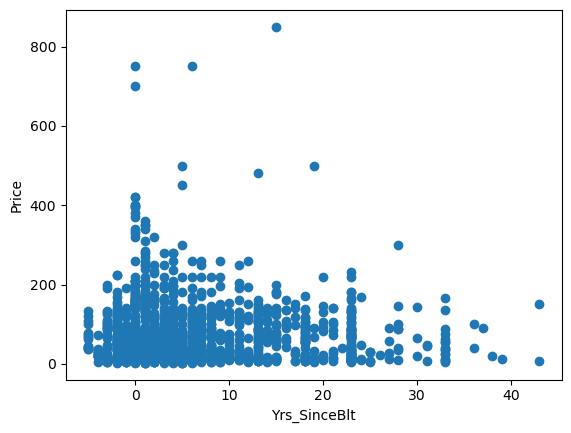

In [34]:
def analyse_yrs_since_blt(df, current_year):
    
    df = df.copy()
    
    df['CurrYr'] = current_year
    # capture difference between a year variable and year
    # in which the house was sold
    df['Yrs_SinceBlt'] = df['CurrYr'] - df['Year']
    
    plt.scatter(df['Yrs_SinceBlt'], df['Price_in_millions'])
    plt.ylabel('Price')
    plt.xlabel('Yrs_SinceBlt')
    plt.show()
    
    
analyse_yrs_since_blt(data, current_year)

We see that there is a tendency to a decrease in price, with older houses. In other words, the longer the time between the house was built, the lower the Price. Which makes sense, cause this means that the house will have an older look, and potentially needs repairs.

In [35]:
# #add this after filling in the missing values in the 'Year' column

# def elapsed_years(df, current_year):
#     # capture difference between the year variable (i.e. when it was built) and the year now
#     df['CurrYr'] = current_year
#     df['Yrs_SinceBlt'] = df['CurrYr'] - df['Year']
#     return df

# data = elapsed_years(data, current_year)
# data.head(4)

## 3. Explore Missing values

Let's go ahead and find out which variables of the dataset contain missing values.

In [36]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending = False)

Elevators             0.878794
Floors_in_Building    0.866775
Year                  0.758810
Bathrooms             0.095946
Bedrooms              0.073538
Size_in_SqYds         0.021899
dtype: float64

Our dataset contains a few variables with a big proportion of missing values (4 variables at the top). And some other variables with a small percentage of missing observations.

This means that to train a machine learning model with this data set, we need to impute the missing data in these variables.

We can also visualize the percentage of missing values in the variables as follows:

In [37]:
missing_values_01 = widgets.FloatSlider(value = 0.7, min = 0, max = 1, step = 0.01, description = 'Missing Values 01')
missing_values_02 = widgets.FloatSlider(value = 0.8, min = 0, max = 1, step = 0.01, description = 'Missing Values 02')

@widgets.interact(missing_values_01 = missing_values_01, missing_values_02 = missing_values_02)
def draw_axhline(missing_values_01, missing_values_02):
    data[vars_with_na].isnull().mean().sort_values(ascending = False).plot.bar(figsize = (10, 4))
    plt.ylabel('Percentage of missing data')
    plt.axhline(y = missing_values_01, color = 'g', linestyle = '-')
    # plt.text(0.1, missing_values_01, '%age of Missing Values', ha = 'left', va = 'bottom')
    plt.axhline(y = missing_values_02, color = 'r', linestyle = '-')
    # plt.text(0.1, missing_values_02, '%age of Missing Values', ha = 'left', va = 'bottom')
    plt.show()

interactive(children=(FloatSlider(value=0.7, description='Missing Values 01', max=1.0, step=0.01), FloatSlider…

In [38]:
# now we can determine which variables, from those with missing data,
# are numerical and which are categorical

cat_na = [var for var in cat_vars if var in vars_with_na]
num_na = [var for var in num_vars if var in vars_with_na]

print('Number of categorical variables with na: ', len(cat_na))
print('Number of numerical variables with na: ', len(num_na))

Number of categorical variables with na:  0
Number of numerical variables with na:  6


In [39]:
num_na

['Bedrooms',
 'Bathrooms',
 'Size_in_SqYds',
 'Floors_in_Building',
 'Elevators',
 'Year']

In [40]:
cat_na

[]

### Relationship between missing data and "Price_in_millions"

Let's evaluate the price of the house in those observations where the information is missing. We will do this for each variable that shows missing data.

In [41]:
def analyse_na_value(df, var):

    # copy of the dataframe, so that we do not override the original data
    # see the link for more details about pandas.copy()
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
    df = df.copy()

    # let's make an interim variable that indicates 1 if the
    # observation was missing or 0 otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)

    # let's compare the median SalePrice in the observations where data is missing
    # vs the observations where data is available

    # determine the median price in the groups 1 and 0,
    # and the standard deviation of the sale price,
    # and we capture the results in a temporary dataset
    tmp = df.groupby(var)['Price_in_millions'].agg(['mean', 'std'])

    # plot into a bar graph
    tmp.plot(kind = "barh", y = "mean", legend = True,
             xerr = "std", title = "Price_in_millions", color = 'green')

    plt.show()

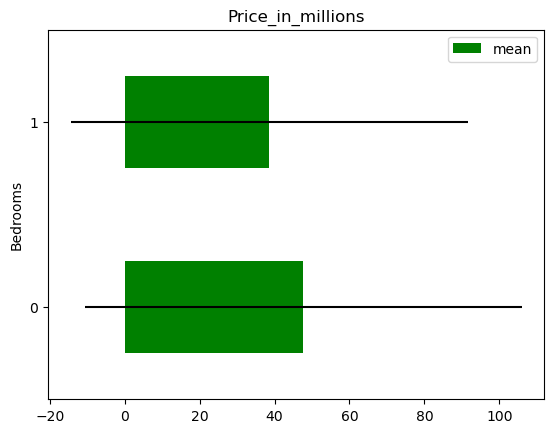

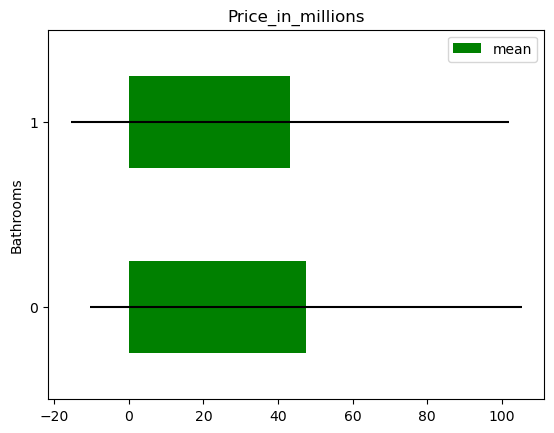

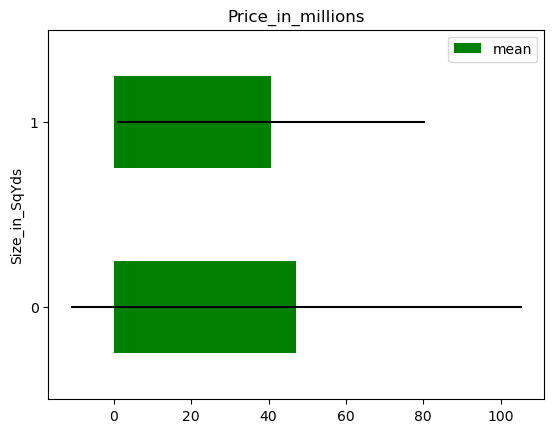

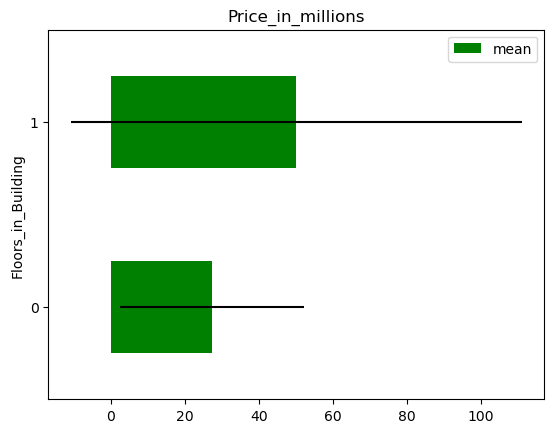

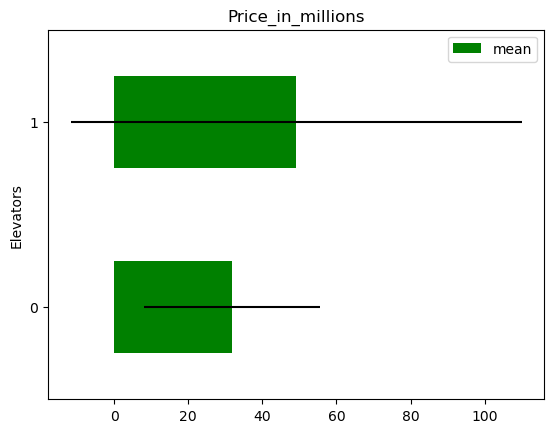

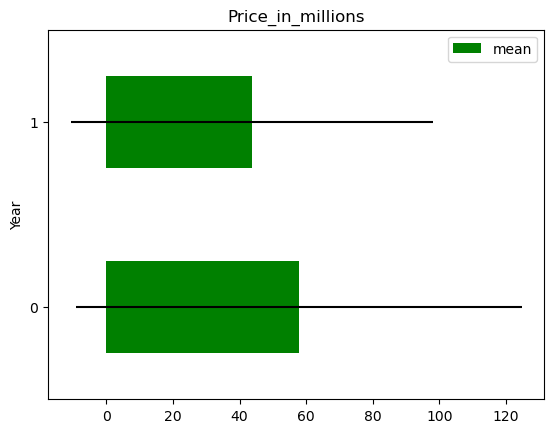

In [42]:
# let's run the function on each variable with missing data

for var in vars_with_na:
    analyse_na_value(data, var)

In some variables, the average "Price_in_millions" of the property where the information is missing, differs from the average "Price_in_millions" of the property where information exists. This suggests that data being missing could be a good predictor of "Price_in_millions".

## 4. Impute Missing values

In [43]:
# make a list of the variables that contain missing values
vars_with_na = [var for var in data.columns if data[var].isnull().sum() > 0]

# determine percentage of missing values (expressed as decimals)
# and display the result ordered by % of missin data

data[vars_with_na].isnull().mean().sort_values(ascending = False)

Elevators             0.878794
Floors_in_Building    0.866775
Year                  0.758810
Bathrooms             0.095946
Bedrooms              0.073538
Size_in_SqYds         0.021899
dtype: float64

### Impute missing values for Numerical variables

To engineer missing values in numerical variables, we will:

- add a binary missing indicator variable
- and then replace the missing values in the original variable either with the mean or with some condition using domain knowledge.

In [44]:
# now let's identify the numerical variables

num_vars = [
    var for var in data.columns if var not in cat_vars and (var != 'Price_in_millions') and (var != 'log_price')
]

# number of numerical variables
print(f"Lenght of num_vars: {len(num_vars)}")
print(f"num_vars: {num_vars}")

Lenght of num_vars: 51
num_vars: ['Bedrooms', 'Bathrooms', 'Size_in_SqYds', 'Parking_Spaces', 'Floors_in_Building', 'Elevators', 'Lobby_in_Building', 'Double_Glazed_Windows', 'Central_Air_Conditioning', 'Central_Heating', 'Waste_Disposal', 'Furnished', 'Service_Elevators_in_Building', 'Flooring', 'Electricity_Backup', 'Servant_Quarters', 'Study_Room', 'Prayer_Room', 'Powder_Room', 'Gym', 'Lounge_or_Sitting_Room', 'Laundry_Room', 'Business_Center_or_Media_Room_in_Building', 'Satellite_or_Cable_TV_Ready', 'Broadband_Internet_Access', 'Intercom', 'Conference_Room_in_Building', 'Community_Swimming_Pool', 'Community_Lawn_or_Garden', 'Community_Gym', 'Community_Center', 'First_Aid_or_Medical_Centre', 'Day_Care_center', 'Kids_Play_Area', 'Mosque', 'Barbeque_Area', 'Lawn_or_Garden', 'Swimming_Pool', 'Sauna', 'Jacuzzi', 'Nearby_Schools', 'Nearby_Hospital', 'Nearby_Shopping_Malls', 'Nearby_Restaurants', 'Nearby_Public_Transport_Service', 'Other_Nearby_Places', 'Security_Staff', 'Maintainance_Sta

In [45]:
# make a list with the numerical variables that contain missing values
vars_with_na = [
    var for var in num_vars
    if data[var].isnull().sum() > 0
]

print(f"vars_with_na: {vars_with_na}")

# print percentage of missing values per variable
data[vars_with_na].isnull().mean()

vars_with_na: ['Bedrooms', 'Bathrooms', 'Size_in_SqYds', 'Floors_in_Building', 'Elevators', 'Year']


Bedrooms              0.073538
Bathrooms             0.095946
Size_in_SqYds         0.021899
Floors_in_Building    0.866775
Elevators             0.878794
Year                  0.758810
dtype: float64

In [46]:
data.loc[(data['Type'] == 'House')]['Floors_in_Building'].unique()

array([nan,  3.])

In [47]:
print("Missing values in column 'Floors_in_Building' if column 'Type' is: Flat")
print(len(data.loc[(data['Type'] == 'Flat') & (data['Floors_in_Building'].isnull())][['Type', 'Floors_in_Building']]))

print("Missing values in column 'Floors_in_Building' if column 'Type'is: House")
print(len(data.loc[(data['Type'] == 'House') & (data['Floors_in_Building'].isnull())][['Type', 'Floors_in_Building']]))

Missing values in column 'Floors_in_Building' if column 'Type' is: Flat
3657
Missing values in column 'Floors_in_Building' if column 'Type'is: House
4853


In [48]:
print("Missing values in column 'Elevators' if column 'Type' is: Flat")
print(len(data.loc[(data['Type'] == 'Flat') & (data['Elevators'].isnull())][['Type', 'Elevators']]))

print("Missing values in column 'Elevators' if column 'Type' is: House")
print(len(data.loc[(data['Type'] == 'House') & (data['Elevators'].isnull())][['Type', 'Elevators']]))

Missing values in column 'Elevators' if column 'Type' is: Flat
3774
Missing values in column 'Elevators' if column 'Type' is: House
4854


In [49]:
# replace missing values 

for var in vars_with_na:

    # calculate the mean
    mean_val = np.floor(data[var].mean())
    
    print(var,': Mean: ', mean_val)
    
    # add binary missing indicator
    data[var + '_na'] = np.where(data[var].isnull(), 1, 0)
    
    # replace missing values by the mean or with some conditions using some domain knowledge
    if var == 'Year' or var == 'Bedrooms' or var == 'Bathrooms' or var == 'Size_in_SqYds':
        data[var].fillna(mean_val, inplace = True)
    if var == 'Floors_in_Building':
        condition1 = (data['Type'] == 'Flat') & (data[var].isnull())
        data.loc[condition1, var] = mean_val
        condition2 = (data['Type'] == 'House') & (data[var].isnull())
        # it's very tricky to fill up 'Floors_in_Building' if the property 'Type' is 2/House because 
        # it can vary from 1 to 3 usually not greater than 3, but mostly it remains between 1 or 2
        # and if we take the mean, median, mode, it won't work since each of them is higher than 3
        # so we are taking arbitary value of 1
        # also we can experiment with other values.
        data.loc[condition2, var] = 1
    if var == 'Elevators':
        condition1 = (data['Type'] == 'Flat') & (data[var].isnull())
        data.loc[condition1, var] = mean_val
        condition2 = (data['Type'] == 'House') & (data[var].isnull())
        # Type 2/House usually doesn't have elevators
        data.loc[condition2, var] = 0
        
    

#check that we have no more missing values in the engineered variables
data[vars_with_na].isnull().sum()

Bedrooms : Mean:  3.0
Bathrooms : Mean:  3.0
Size_in_SqYds : Mean:  260.0
Floors_in_Building : Mean:  11.0
Elevators : Mean:  2.0
Year : Mean:  2018.0


Bedrooms              0
Bathrooms             0
Size_in_SqYds         0
Floors_in_Building    0
Elevators             0
Year                  0
dtype: int64

In [50]:
# check the binary missing indicator variables

data[['Year_na', 'Bedrooms_na', 'Bathrooms_na', 'Size_in_SqYds_na', 'Floors_in_Building_na', 'Elevators_na']].head()

,Year_na,Bedrooms_na,Bathrooms_na,Size_in_SqYds_na,Floors_in_Building_na,Elevators_na
0,1,0,0,0,1,1
1,1,0,0,0,1,1
2,0,0,0,0,0,0
3,0,0,0,0,1,1
4,1,0,0,0,1,1


#### 'Year'/Time Related variables

In [51]:
def elapsed_years(df, current_year):
    # capture difference between the year variable (i.e. when it was built) and the year now
    df['CurrYr'] = current_year
    df['Yrs_SinceBlt'] = df['CurrYr'] - df['Year']
    return df

data = elapsed_years(data, current_year)
#data.head(4)

In [52]:
#drop columnns
data.drop(['CurrYr'], axis = 1, inplace = True)

In [53]:
#data.head(4)

In [54]:
#update the year_vars
year_vars = year_vars + ['Yrs_SinceBlt']
year_vars

['Year', 'Yrs_SinceBlt']

### Impute missing values for Categorical variables

We will replace missing values with the string "missing" in those variables with a lot of missing data. 

Alternatively, we will replace missing data with the most frequent category in those variables that contain fewer observations without values. 

This is common practice.

Here, we don't have any categorical variable that have missing values, but for demonstration purpose we include the following code to show how to deal with if there is any

In [55]:
# let's identify the categorical variables
# we will capture those of type object

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# number of categorical variables
print(f"Lenght of cat_vars: {len(cat_vars)}")
print(f"cat_vars: {cat_vars}")

Lenght of cat_vars: 2
cat_vars: ['Location1', 'Type']


In [56]:
# make a list of the categorical variables that contain missing values

cat_vars_with_na = [var for var in cat_vars if data[var].isnull().sum() > 0]

# print percentage of missing values per variable
data[cat_vars_with_na ].isnull().mean().sort_values(ascending = False)

Series([], dtype: float64)

In [57]:
# variables to impute with the string missing
with_string_missing = [
    var for var in cat_vars_with_na if data[var].isnull().mean() > 0.1]

# variables to impute with the most frequent category
with_frequent_category = [
    var for var in cat_vars_with_na if data[var].isnull().mean() < 0.1]

In [58]:
with_string_missing

[]

In [59]:
# replace missing values with new label: "Missing"

data[with_string_missing] = data[with_string_missing].fillna('Missing')
data[with_string_missing] = data[with_string_missing].fillna('Missing')

In [60]:
for var in with_frequent_category:
    
    # there can be more than 1 mode in a variable
    # we take the first one with [0]    
    mode = data[var].mode()[0]
    
    print(var, mode)
    
    data[var].fillna(mode, inplace = True)
    data[var].fillna(mode, inplace = True)

In [61]:
# check that we have no missing information in the engineered variables

data[cat_vars_with_na].isnull().sum()

Series([], dtype: float64)

In [62]:
# check that data does not contain null values in the engineered variables

[var for var in cat_vars_with_na if data[var].isnull().sum() > 0]

[]

## 5. Convert Datatypes of Columns

In [63]:
#data['Yrs_SinceBlt'].value_counts()

In [64]:
#convert all float64 columns to int32
# float_cols = ['Bedrooms', 'Bathrooms', 'Floors_in_Building', 'Elevators', 'Year']
# data[float_cols] = data[float_cols].fillna(0).astype('int32')
# int64_cols = data.select_dtypes(include = ['int64']).columns
# data[int64_cols] = data[int64_cols].fillna(0).astype('int32')
# float64_cols = ['Price_in_millions', 'Size_in_SqYds']
# data[float64_cols] = data[float64_cols].fillna(0).astype('float32')

In [65]:
#convert all float64 columns to int32/float32
# float_cols = ['Bedrooms', 'Bathrooms', 'Floors_in_Building', 'Elevators', 'Year']
float_cols = ['Bedrooms', 'Bathrooms', 'Floors_in_Building', 'Elevators', 'Year', 'Yrs_SinceBlt']
data[float_cols] = data[float_cols].astype('int32')
int64_cols = data.select_dtypes(include = ['int64']).columns
data[int64_cols] = data[int64_cols].astype('int32')
float64_cols = ['Price_in_millions', 'Size_in_SqYds', 'log_price']
data[float64_cols] = data[float64_cols].astype('float32')

In [66]:
#data.info()

## 6. Explore Numerical variables

In [67]:
# now let's identify the numerical variables
num_vars = [
    var for var in data.columns if var not in cat_vars and (var != 'Price_in_millions') and (var != 'log_price')
]

# number of numerical variables
len(num_vars)

print('Number of numerical variables: ', len(num_vars))
print('-' * 34)
print('')

print('List of numerical variables: ', num_vars)
print('-' * 130)
print('')

# visualise the numerical variables
data[num_vars].head()

Number of numerical variables:  58
----------------------------------

List of numerical variables:  ['Bedrooms', 'Bathrooms', 'Size_in_SqYds', 'Parking_Spaces', 'Floors_in_Building', 'Elevators', 'Lobby_in_Building', 'Double_Glazed_Windows', 'Central_Air_Conditioning', 'Central_Heating', 'Waste_Disposal', 'Furnished', 'Service_Elevators_in_Building', 'Flooring', 'Electricity_Backup', 'Servant_Quarters', 'Study_Room', 'Prayer_Room', 'Powder_Room', 'Gym', 'Lounge_or_Sitting_Room', 'Laundry_Room', 'Business_Center_or_Media_Room_in_Building', 'Satellite_or_Cable_TV_Ready', 'Broadband_Internet_Access', 'Intercom', 'Conference_Room_in_Building', 'Community_Swimming_Pool', 'Community_Lawn_or_Garden', 'Community_Gym', 'Community_Center', 'First_Aid_or_Medical_Centre', 'Day_Care_center', 'Kids_Play_Area', 'Mosque', 'Barbeque_Area', 'Lawn_or_Garden', 'Swimming_Pool', 'Sauna', 'Jacuzzi', 'Nearby_Schools', 'Nearby_Hospital', 'Nearby_Shopping_Malls', 'Nearby_Restaurants', 'Nearby_Public_Transport_

,Bedrooms,Bathrooms,Size_in_SqYds,Parking_Spaces,Floors_in_Building,Elevators,Lobby_in_Building,Double_Glazed_Windows,Central_Air_Conditioning,Central_Heating,Waste_Disposal,Furnished,Service_Elevators_in_Building,Flooring,Electricity_Backup,Servant_Quarters,Study_Room,Prayer_Room,Powder_Room,Gym,Lounge_or_Sitting_Room,Laundry_Room,Business_Center_or_Media_Room_in_Building,Satellite_or_Cable_TV_Ready,Broadband_Internet_Access,Intercom,Conference_Room_in_Building,Community_Swimming_Pool,Community_Lawn_or_Garden,Community_Gym,Community_Center,First_Aid_or_Medical_Centre,Day_Care_center,Kids_Play_Area,Mosque,Barbeque_Area,Lawn_or_Garden,Swimming_Pool,Sauna,Jacuzzi,Nearby_Schools,Nearby_Hospital,Nearby_Shopping_Malls,Nearby_Restaurants,Nearby_Public_Transport_Service,Other_Nearby_Places,Security_Staff,Maintainance_Staff,Laundry_or_Dry_Cleaning_Facility,Facilities_for_Disabled,Year,Bedrooms_na,Bathrooms_na,Size_in_SqYds_na,Floors_in_Building_na,Elevators_na,Year_na,Yrs_SinceBlt
0,6,6,600.0,3,1,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,0,0,0,1,1,1,5
1,6,6,240.0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,0,0,0,1,1,1,5
2,2,2,106.0,2,10,4,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2023,0,0,0,0,0,0,0
3,5,5,375.0,4,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2022,0,0,0,1,1,0,1
4,4,4,350.0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2018,0,0,0,1,1,1,5


### Discrete variables

Let's go ahead and find which variables are discrete, i.e., show a finite number of values

In [68]:
#  let's male a list of discrete variables

discrete_vars = [var for var in num_vars if data[var].dtype != 'O' and 
                 data[var].dtype != 'float32' and 
                 data[var].dtype != 'float64'  and 
                 var not in year_vars
                ]


print('Number of discrete variables: ', len(discrete_vars))
print('-' * 34)
print('')
print('discrete_vars: \n', discrete_vars)
print('-' * 100)
print('')

# let's visualise the discrete variables
data[discrete_vars].head()

Number of discrete variables:  55
----------------------------------

discrete_vars: 
 ['Bedrooms', 'Bathrooms', 'Parking_Spaces', 'Floors_in_Building', 'Elevators', 'Lobby_in_Building', 'Double_Glazed_Windows', 'Central_Air_Conditioning', 'Central_Heating', 'Waste_Disposal', 'Furnished', 'Service_Elevators_in_Building', 'Flooring', 'Electricity_Backup', 'Servant_Quarters', 'Study_Room', 'Prayer_Room', 'Powder_Room', 'Gym', 'Lounge_or_Sitting_Room', 'Laundry_Room', 'Business_Center_or_Media_Room_in_Building', 'Satellite_or_Cable_TV_Ready', 'Broadband_Internet_Access', 'Intercom', 'Conference_Room_in_Building', 'Community_Swimming_Pool', 'Community_Lawn_or_Garden', 'Community_Gym', 'Community_Center', 'First_Aid_or_Medical_Centre', 'Day_Care_center', 'Kids_Play_Area', 'Mosque', 'Barbeque_Area', 'Lawn_or_Garden', 'Swimming_Pool', 'Sauna', 'Jacuzzi', 'Nearby_Schools', 'Nearby_Hospital', 'Nearby_Shopping_Malls', 'Nearby_Restaurants', 'Nearby_Public_Transport_Service', 'Other_Nearby_Places'

,Bedrooms,Bathrooms,Parking_Spaces,Floors_in_Building,Elevators,Lobby_in_Building,Double_Glazed_Windows,Central_Air_Conditioning,Central_Heating,Waste_Disposal,Furnished,Service_Elevators_in_Building,Flooring,Electricity_Backup,Servant_Quarters,Study_Room,Prayer_Room,Powder_Room,Gym,Lounge_or_Sitting_Room,Laundry_Room,Business_Center_or_Media_Room_in_Building,Satellite_or_Cable_TV_Ready,Broadband_Internet_Access,Intercom,Conference_Room_in_Building,Community_Swimming_Pool,Community_Lawn_or_Garden,Community_Gym,Community_Center,First_Aid_or_Medical_Centre,Day_Care_center,Kids_Play_Area,Mosque,Barbeque_Area,Lawn_or_Garden,Swimming_Pool,Sauna,Jacuzzi,Nearby_Schools,Nearby_Hospital,Nearby_Shopping_Malls,Nearby_Restaurants,Nearby_Public_Transport_Service,Other_Nearby_Places,Security_Staff,Maintainance_Staff,Laundry_or_Dry_Cleaning_Facility,Facilities_for_Disabled,Bedrooms_na,Bathrooms_na,Size_in_SqYds_na,Floors_in_Building_na,Elevators_na,Year_na
0,6,6,3,1,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,6,6,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,2,2,2,10,4,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,5,4,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,4,4,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


These discrete variables tend to be Amenities, or refer to the number of rooms, or bathrooms etc

We expect higher prices, with bigger numbers.

Let's go ahead and analyse their contribution to the house price.

### Evaluate discrete variables with the target variable

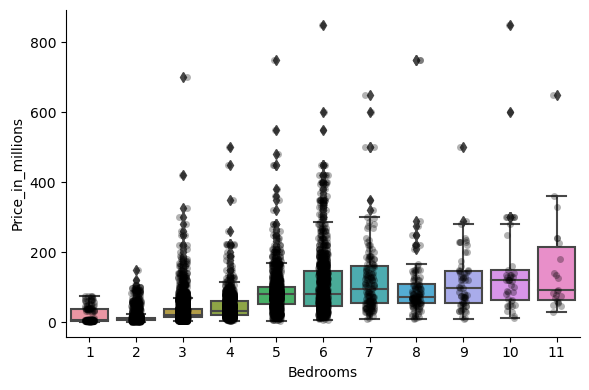

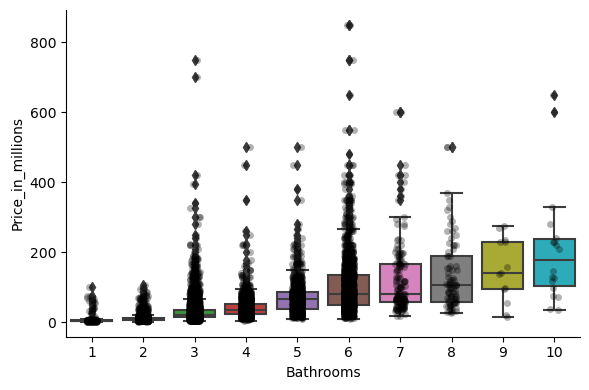

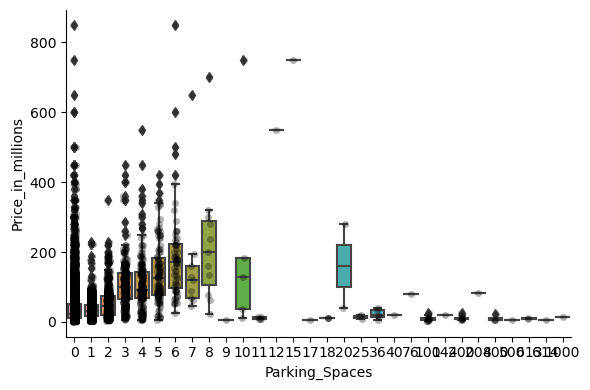

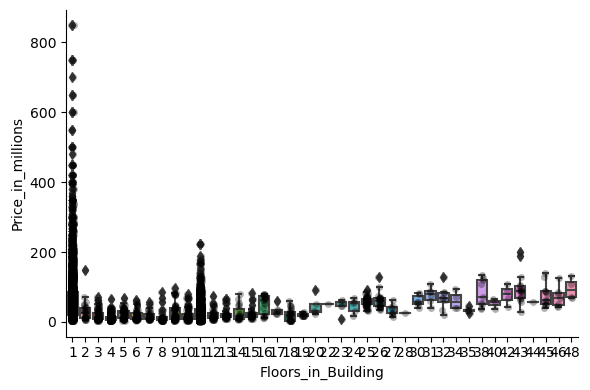

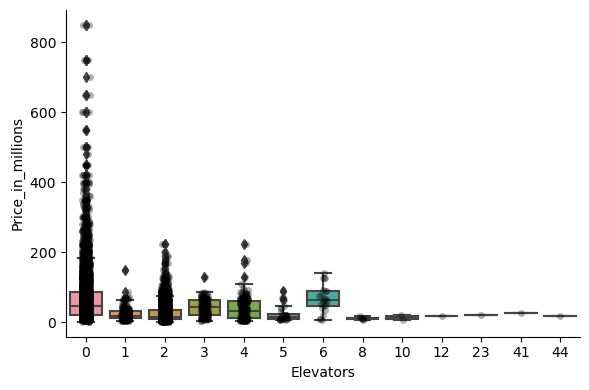

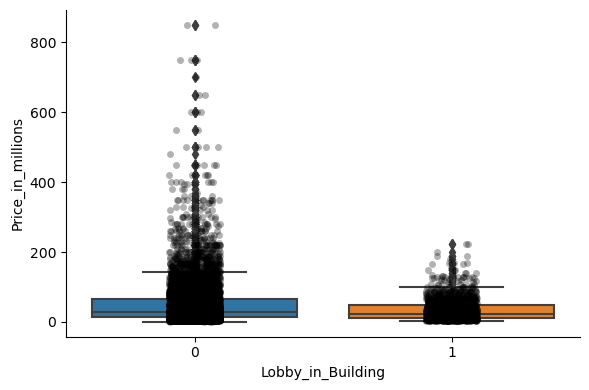

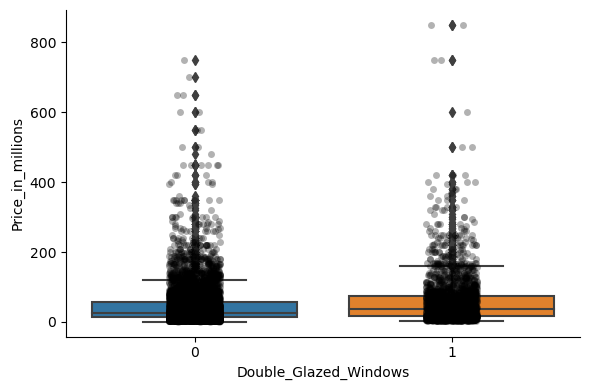

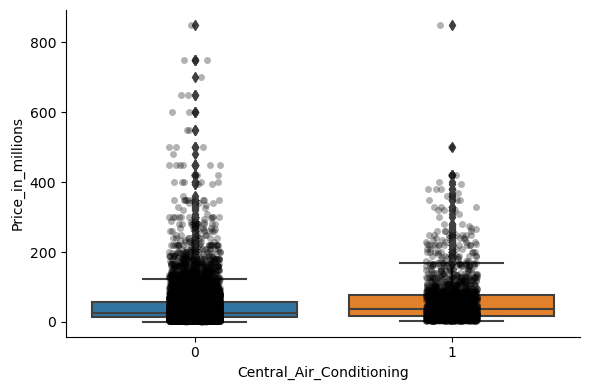

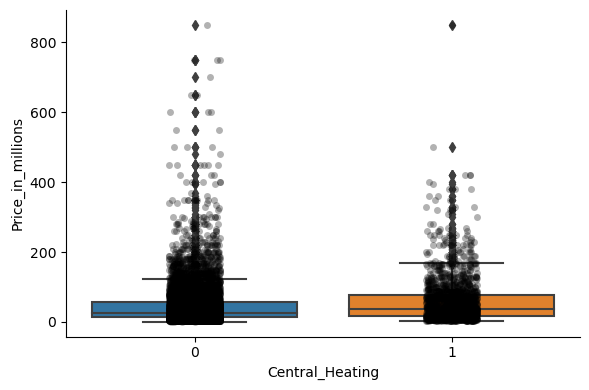

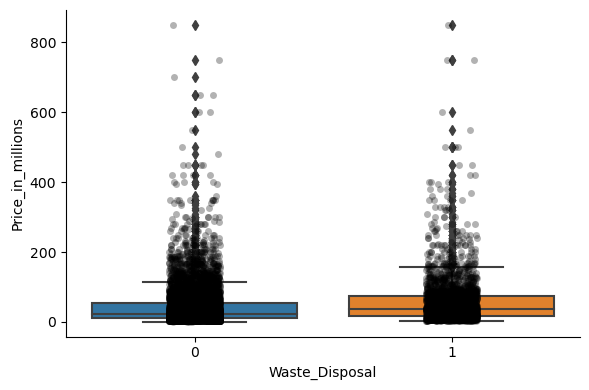

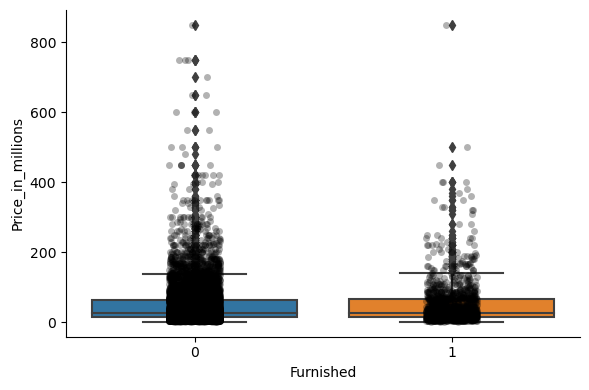

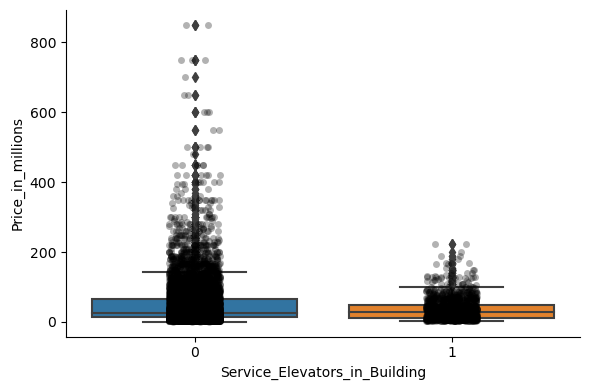

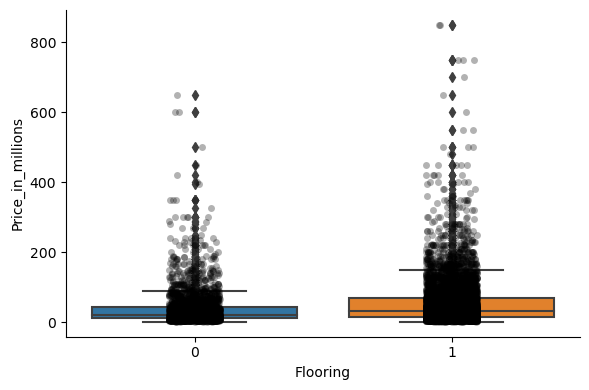

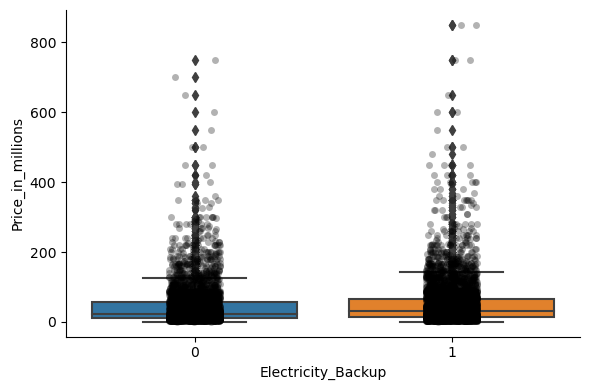

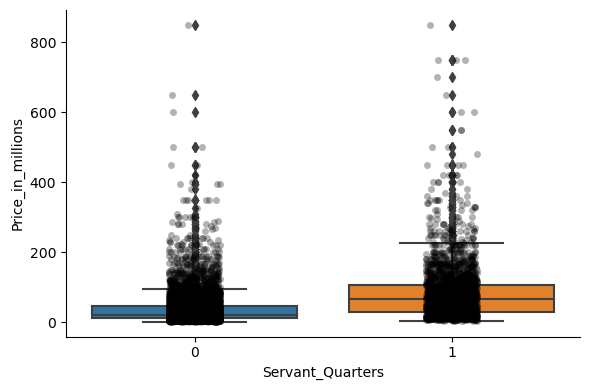

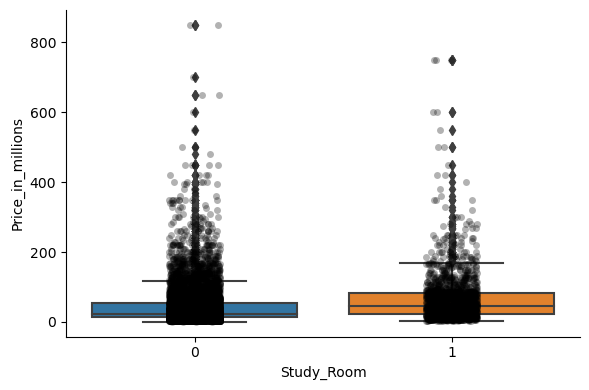

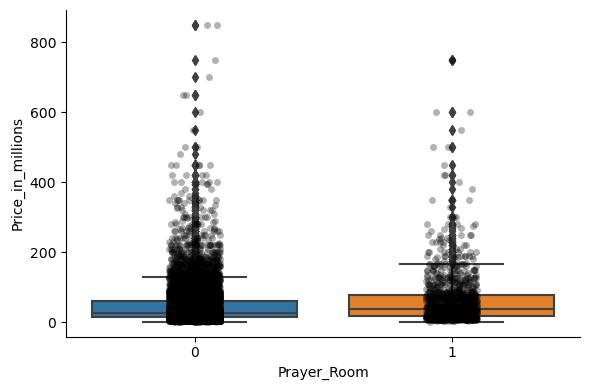

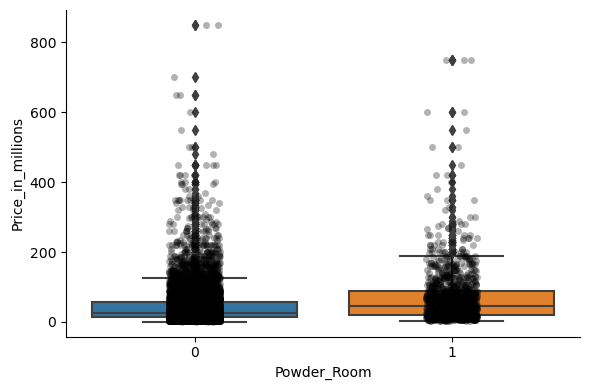

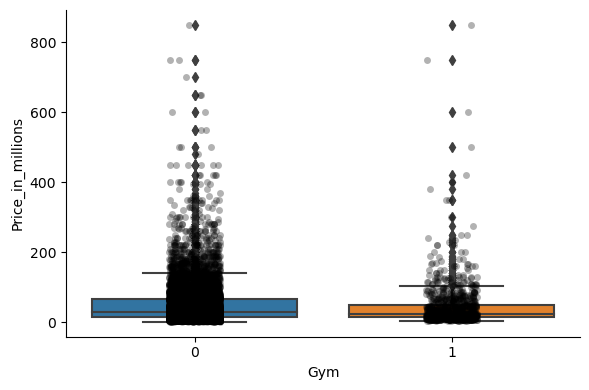

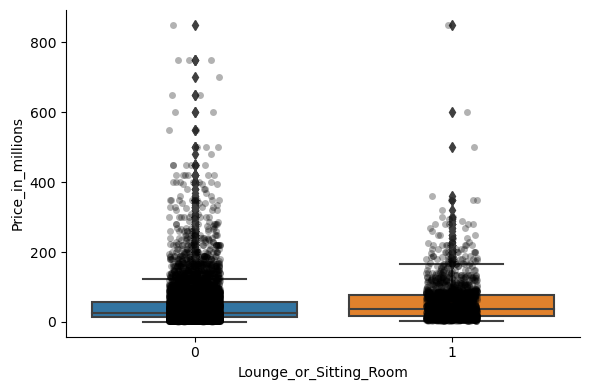

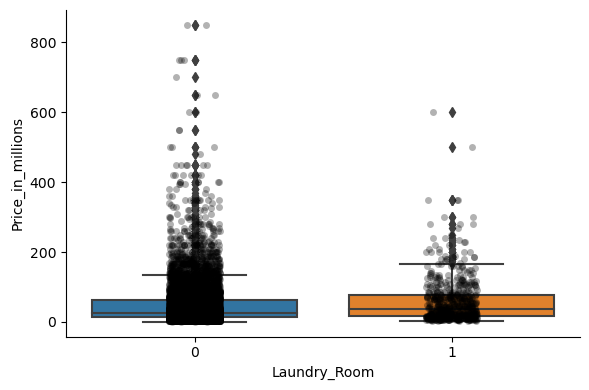

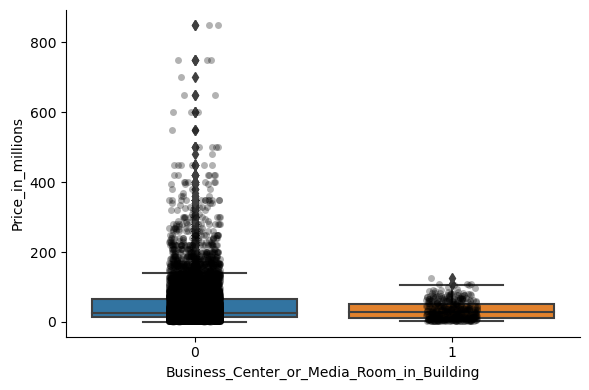

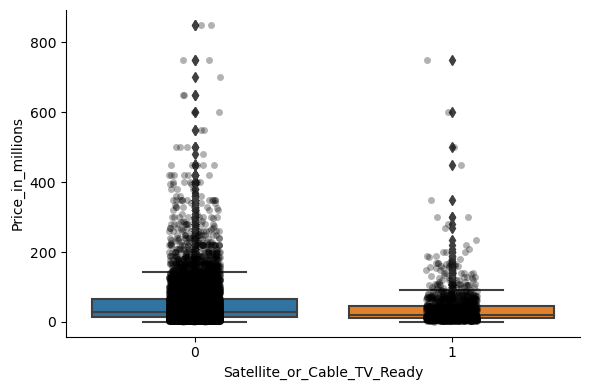

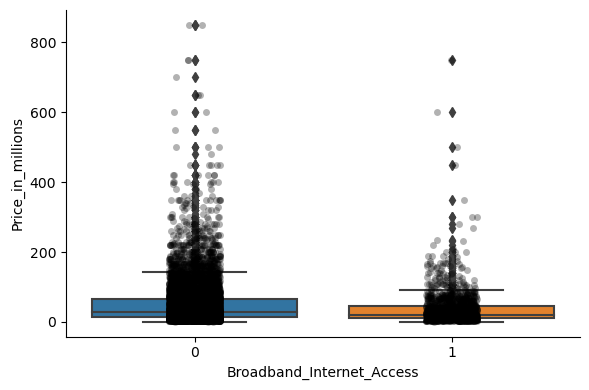

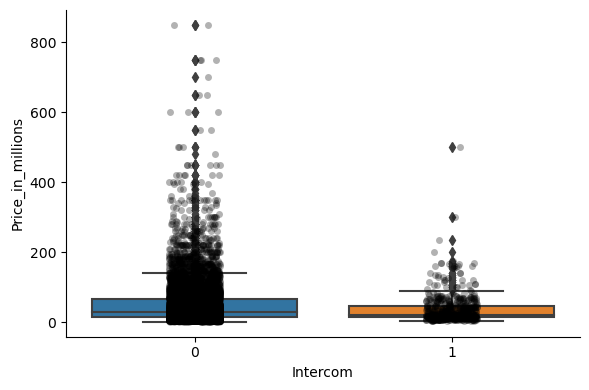

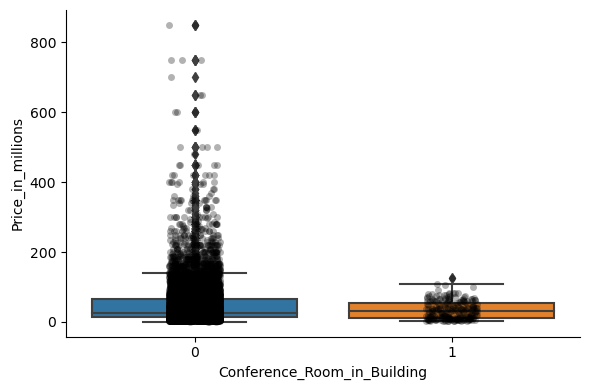

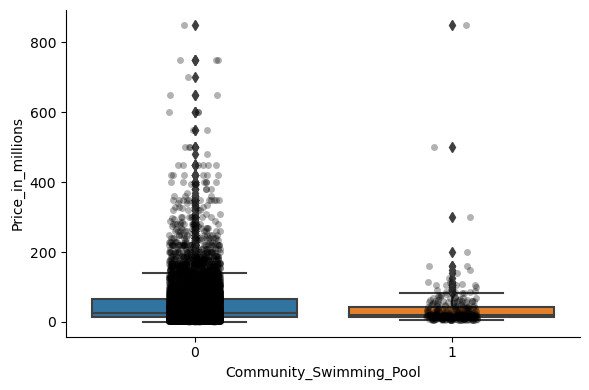

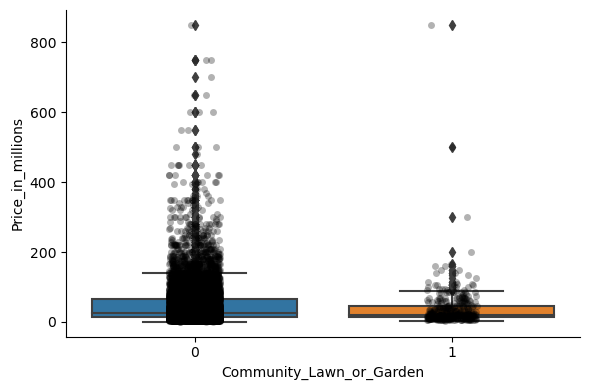

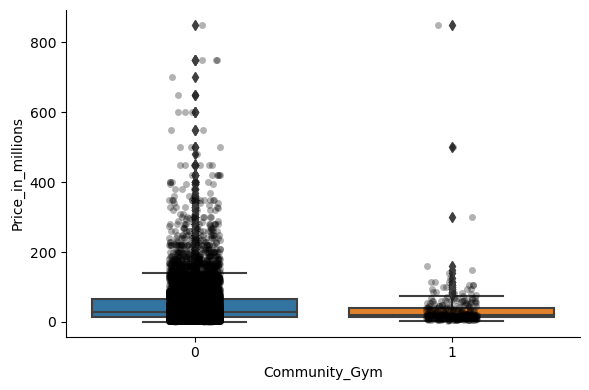

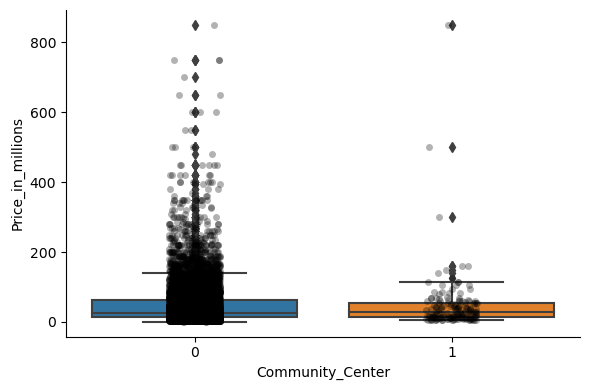

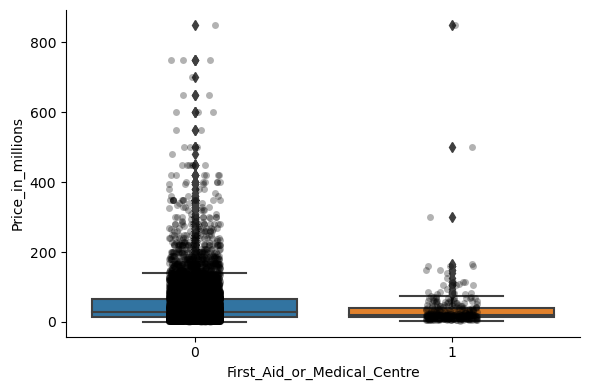

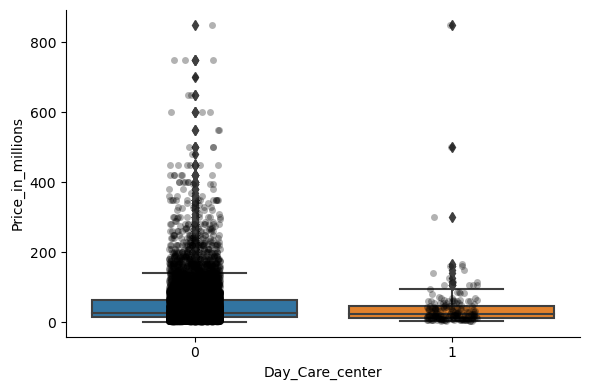

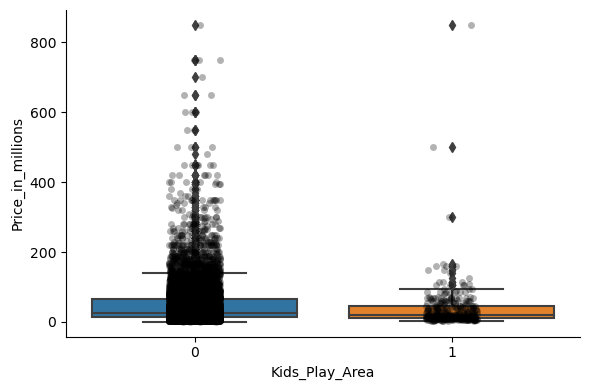

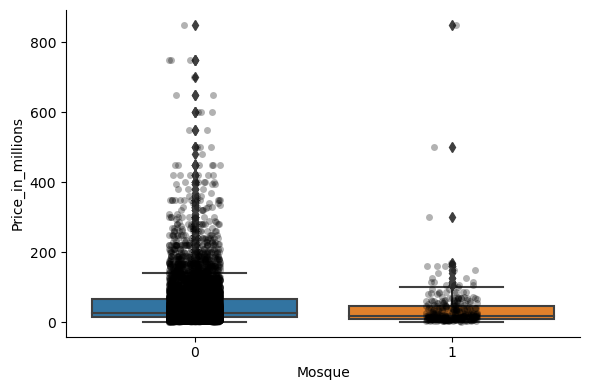

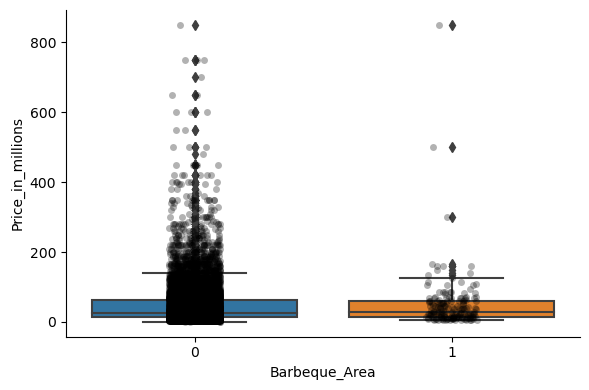

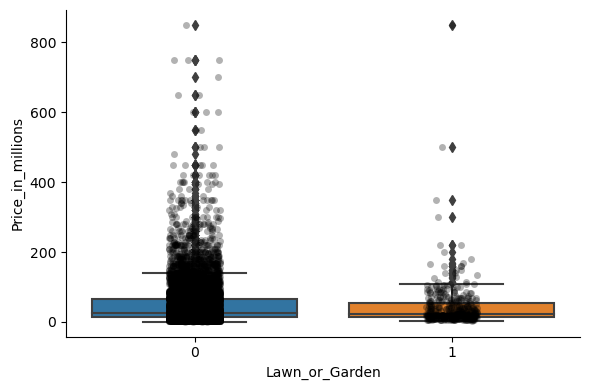

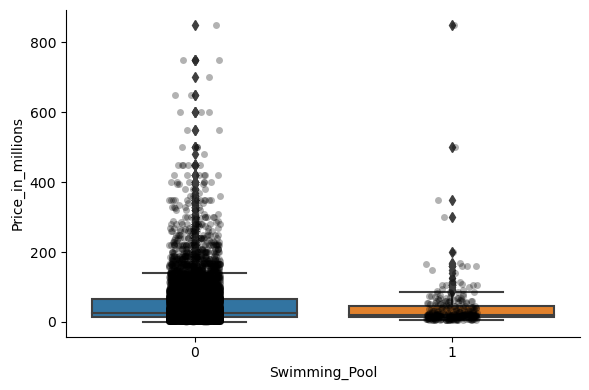

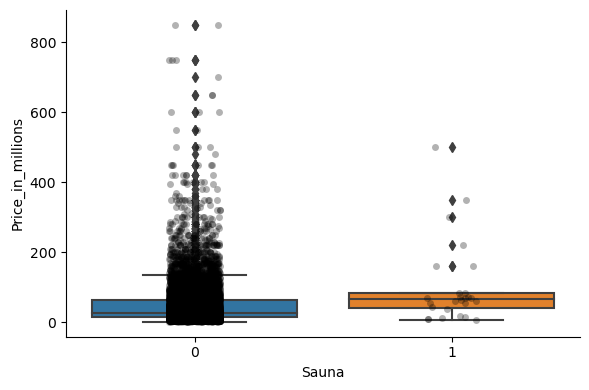

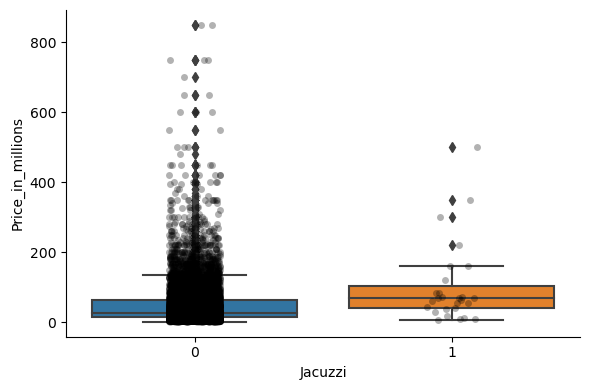

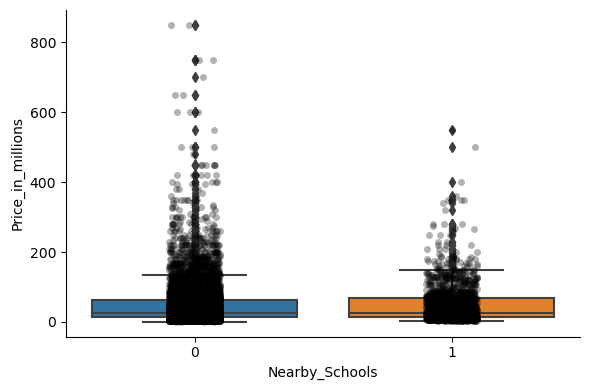

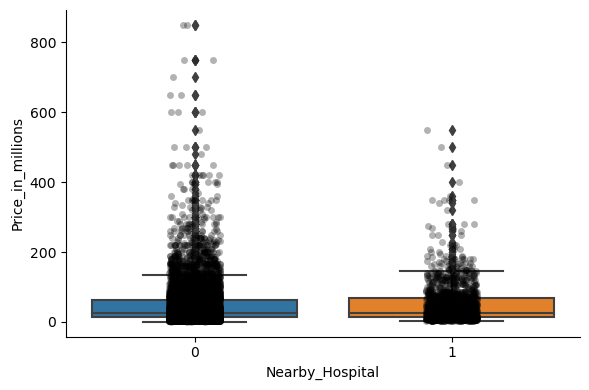

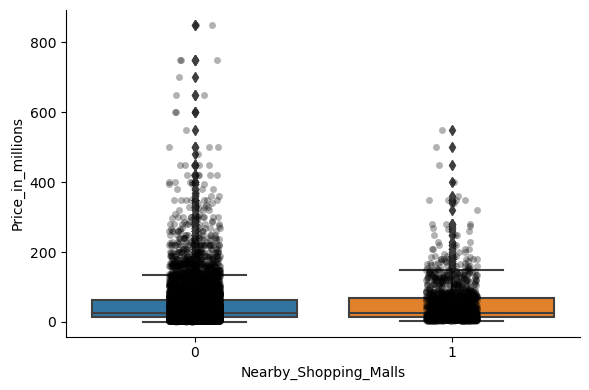

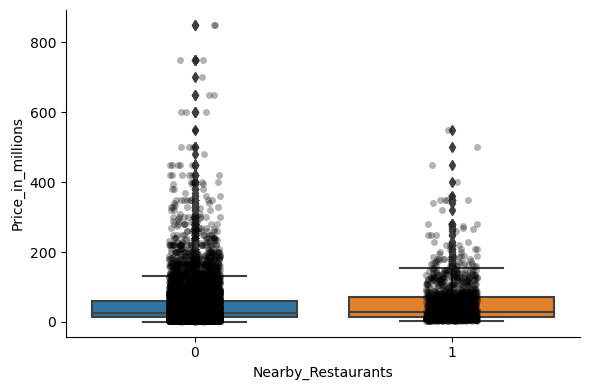

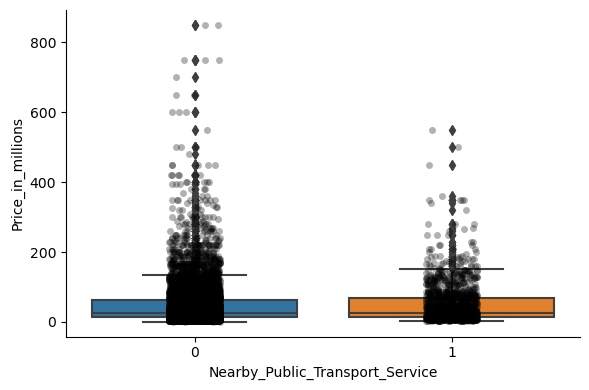

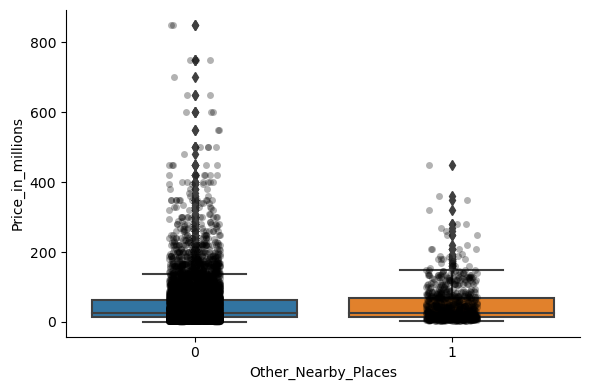

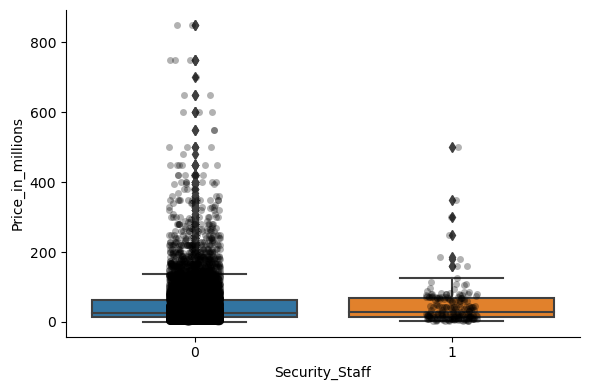

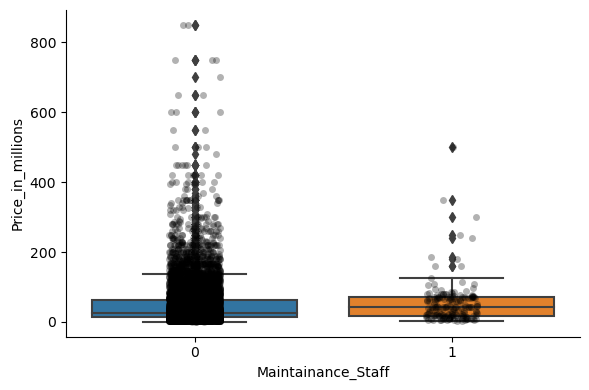

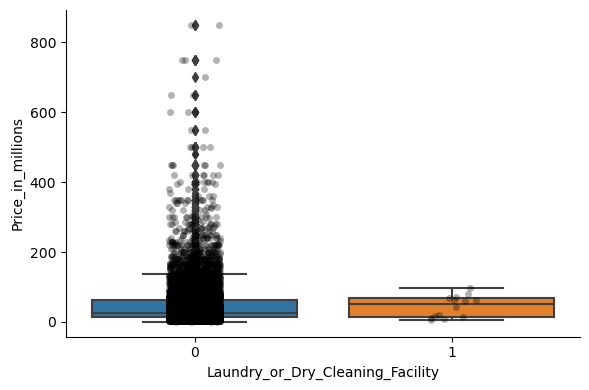

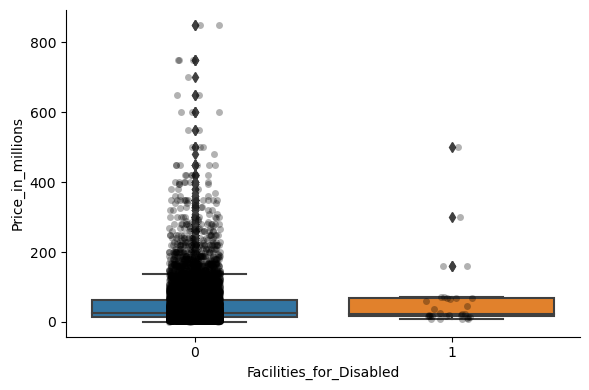

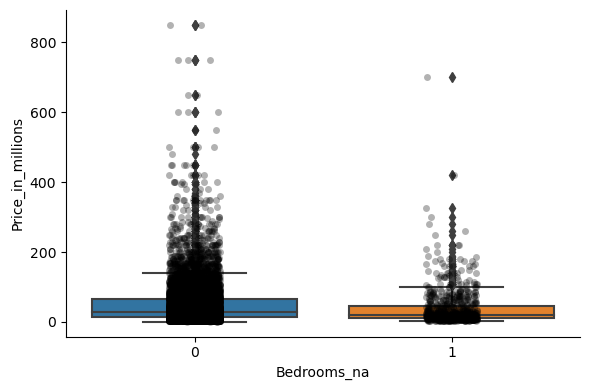

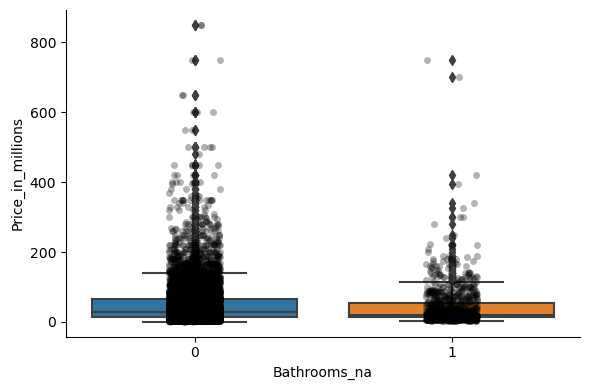

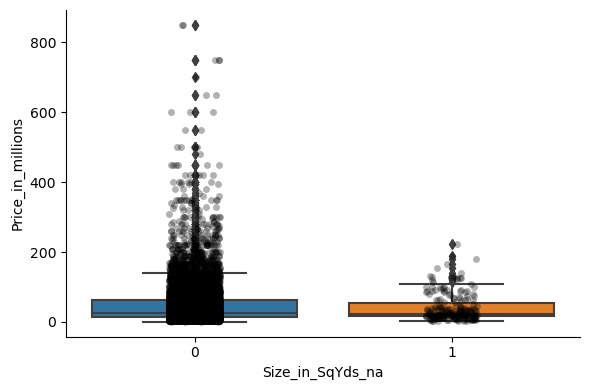

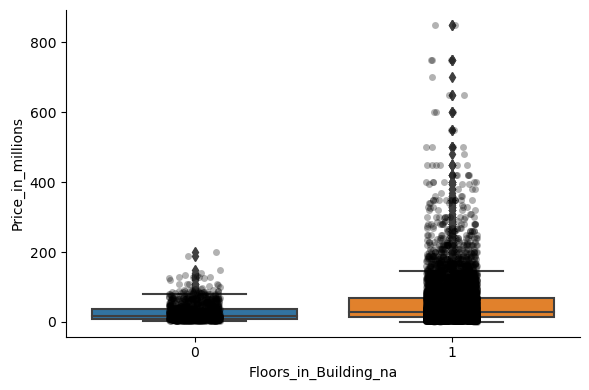

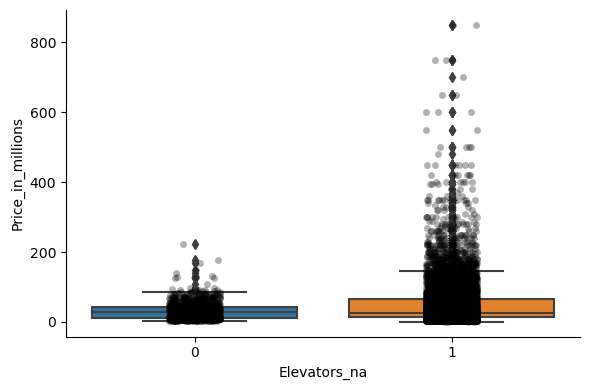

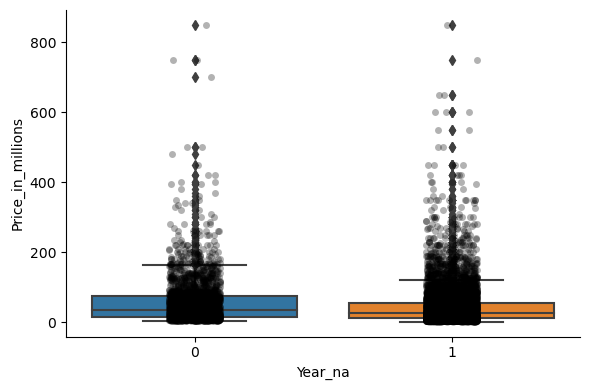

In [69]:
for var in discrete_vars:
    # make boxplot with Catplot
    sns.catplot(x = var, y = 'Price_in_millions', data = data, kind = "box", height = 4, aspect = 1.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x = var, y = 'Price_in_millions', data = data, jitter = 0.1, alpha = 0.3, color = 'k')
    plt.show()

For most discrete numerical variables, we see an increase in the price, with the number of rooms, bathrooms, central air conditioning, Servant_Quarters, Study Room, Prayer_Room, Sauna, Jacuzzi etc.

For most variables, we don't see this tendency. Most likely those variables are not a good predictor of price.

### Continuous variables
    - Distribution

Let's go ahead and find the distribution of the continuous variables. We will consider continuous variables to all those that are not temporal or discrete.

In [70]:
# make list of continuous variables
cont_vars = [
    var for var in num_vars if var not in discrete_vars + year_vars]

print('Number of continuous variables: ', len(cont_vars))

Number of continuous variables:  1


In [71]:
# let's visualise the continuous variables

data[cont_vars].head()

,Size_in_SqYds
0,600.0
1,240.0
2,106.0
3,375.0
4,350.0


In [72]:
data[cont_vars].describe()

,Size_in_SqYds
count,9818.000000
mean,260.481964
std,288.747589
min,28.000000
25%,120.000000
50%,200.000000
75%,311.000000
max,20000.000000


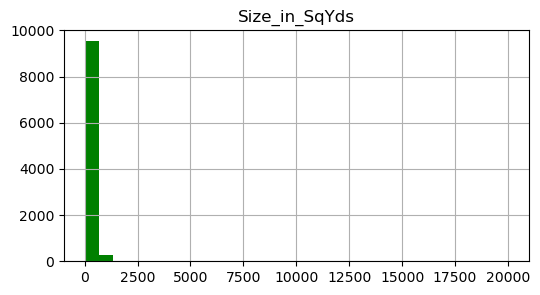

In [73]:
# lets plot histograms for all continuous variables

data[cont_vars].hist(bins = 30, figsize = (6, 3), color = 'green')
plt.show()

The variable/s are not normally distributed. And there is/are a particular few that are extremely skewed.

Sometimes, transforming the variables to improve the value spread, improves the model performance. But it is unlikely that a transformation will help change the distribution of the super skewed variables dramatically.

We can apply a log/Yeo-Johnson transformation to variables and a binary transformation to variables if variable/s contain the value 0 (we can't apply the logarithmic transformation).

Let's go ahead and do that.

variable 'Price_in_millions' is the target variable which we have discussed earlier so let's drop it

In [74]:
# capture the remaining continuous variables

cont_vars = [
    'Size_in_SqYds'
]

#### Continuous variables
- Logarithmic Transformation
- Evaluate the relationship of Logarithmic Transformation with the target

#### - Logarithmic Transformation

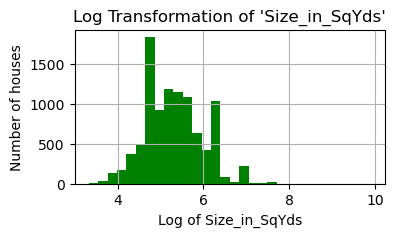

In [75]:
# Let's go ahead and analyse the distributions of the variables
# after applying a log transformation

# temporary copy of the data
tmp = data.copy()

for var in cont_vars:
    
    # plot the histograms of the transformed variables
    np.log(tmp[cont_vars]).hist(bins = 30, figsize = (4, 2), color = 'green')
    plt.ylabel( 'Number of houses' )
    plt.xlabel(f"Log of {var}")
    plt.title(f"Log Transformation of '{var}'")
    plt.show()

the values seem to be spread more evenly in the range.

Whether this helps improve the predictive power, remains to be seen. To determine if this is the case, we should train a model with the original values and one with the transformed values, and determine model performance, and feature importance. We will see it at later stage.

Here, we will do a quick visual exploration here instead:

#### - Evaluate the relationship of Logrithmic Transformation with the target

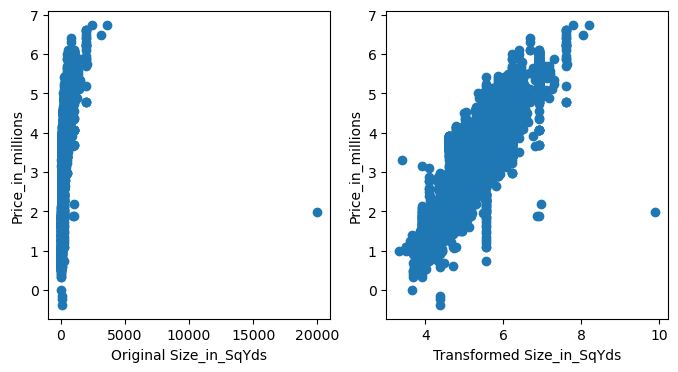

In [76]:
# let's plot the original or transformed variables
# vs sale price, and see if there is a relationship

for var in cont_vars:
    
    plt.figure(figsize = (8, 4))
    
    # plot the original variable vs sale price    
    plt.subplot(1, 2, 1)
    plt.scatter(data[var], np.log(data['Price_in_millions']))
    plt.ylabel('Price_in_millions')
    plt.xlabel('Original ' + var)

    # plot transformed variable vs sale price
    plt.subplot(1, 2, 2)
    plt.scatter(np.log(data[var]), np.log(tmp['Price_in_millions']))
    plt.ylabel('Price_in_millions')
    plt.xlabel('Transformed ' + var)
                
    plt.show()

By eye, the transformations seems to improve the relationship.

We can try different transformations but let's just stick to the logarithmic transformation for now. If variables contain the value 0, and thus we can't apply the logarithmic transformation, but we can certainly do that for the following variables:

['Size_in_SqYds']

In [77]:
data['log_Size_in_SqYds'] = np.log(data['Size_in_SqYds'])

The transformed variables have a better spread of the values, which may in turn, help make better predictions.

### Continuous variables
    - skewed variables

In [78]:
# first make a list with the super skewed variables
# If variable/s contain the value 0, and thus we can't apply the logarithmic transformation,


# skewed = [
#     'Size_in_SqYds'
# ]

# for var in skewed:
    
#     tmp = data.copy()
    
#     # map the variable values into 0 and 1
#     tmp[var] = np.where(data[var]==0, 0, 1)
    
#     # determine mean sale price in the mapped values
#     tmp = tmp.groupby(var)['Price_in_millions'].agg(['mean', 'std'])

#     # plot into a bar graph
#     tmp.plot(kind = "barh", y = "mean", legend = False,
#              xerr = "std", title="Price_in_millions", color = 'green')

#     plt.show()

# There seem to be a difference in Price in the mapped values, but the confidence intervals overlap, 
# so most likely this is not significant or predictive.

## 7. Explore categorical variables

Let's go ahead and analyse the categorical variables present in the dataset.

In [79]:
print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  2


In [80]:
# let's visualise the values of the categorical variables
data[cat_vars].head()

,Location1,Type
0,"DHA Phase 6, DHA Defence",House
1,"Saadi Town - Block 3, Saadi Town, Scheme 33",House
2,"Bahria Town - Precinct 19, Bahria Town Karachi",Flat
3,"Askari 5 - Sector J, Askari 5, Malir Cantonmen...",House
4,"Bahria Town - Precinct 35, Bahria Sports City,...",House


## Number of labels: cardinality

Let's evaluate how many different categories are present in each of the variables.

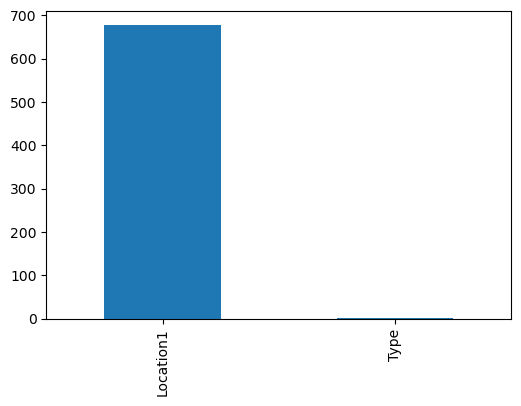

In [81]:
# we count unique categories with pandas unique() 
# and then plot them in descending order

data[cat_vars].nunique().sort_values(ascending = False).plot.bar(figsize = (6, 4))
plt.show()

Clearly shows one variable has extremely high cardinality and other has very low. The one with high cardinality will be a problem during feature engineering.

### Low Cardinality Variables

In [82]:
data['Type'].unique()

array(['House', 'Flat'], dtype=object)

'Type' variable contains two labels:

- House
- Flat

#### Mapping in 'Type' variable

In [83]:
# re-map strings to numbers

type_mappings = {'Missing': 0, 'NA': 0, 'NaN': 0, 'Flat': 1, 'House': 2}

type_vars = ['Type']

for var in type_vars:
    data[var] = data[var].map(type_mappings)

In [84]:
#data.loc[data['Type'] == 1].head(3)

In [85]:
# capture all Low Cardinality Variables. Here it's only one
# i.e. type_vars
# otherwise
# all_low_card_vars  = type_vars + other_vars + ['var1','var2','var3']

In [86]:
for var in type_vars:
    print(f"Distribution of Labels in Category or Column:")
    print('-' * 45)
    print(data[var].value_counts())

Distribution of Labels in Category or Column:
---------------------------------------------
1    4963
2    4855
Name: Type, dtype: int64


#### - Explore the relationship between the labels in 'Type' and the house price

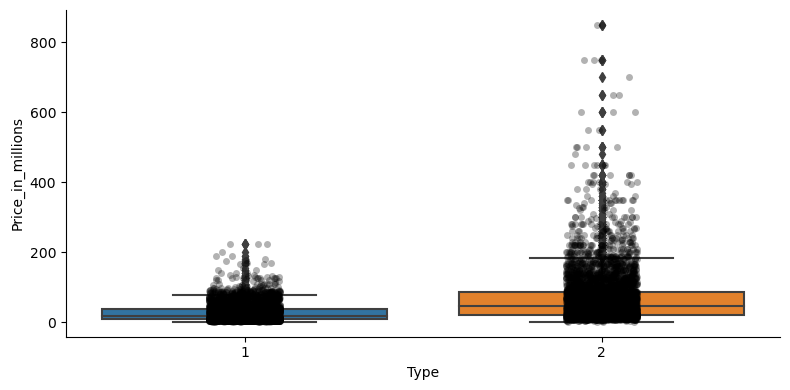

In [87]:
# now let's plot the house mean sale price based on the quality of the 
# various attributes

for var in type_vars:
    # make boxplot with Catplot
    sns.catplot(x = var, y = 'Price_in_millions', data = data, kind = "box", height = 4, aspect = 2)
    # add data points to boxplot with stripplot
    sns.stripplot(x = var, y = 'Price_in_millions', data = data, jitter = 0.1, alpha = 0.3, color = 'k')
    plt.show()

For most attributes, the increase in the house price with the value of the variable, is quite clear.

### High Cardinality

##### Following is the one way to deal with high cardinality, but by removing rare labels we can greatly reduce the cardinality

#### Dimensionality Reduction

In [88]:
# # https://towardsdatascience.com/dealing-with-features-that-have-high-cardinality-1c9212d7ff1b
# from collections import Counter

# def cumulatively_categorise(column, threshold = 0.33, return_categories_list = True):
    
#     #Find the threshold value using the percentage and number of instances in the column
#     threshold_value = int(threshold*len(column))
#     #Initialise an empty list for our new minimised categories
#     categories_list = []
#     #Initialise a variable to calculate the sum of frequencies
#     s = 0
#     #Create a counter dictionary of the form unique_value: frequency
#     counts = Counter(column)

#     #Loop through the category name and its corresponding frequency after sorting the categories by descending order of frequency
#     for i, j in counts.most_common():
#         #Add the frequency to the global sum
#         s += dict(counts)[i]
#         #Append the category name to the list
#         categories_list.append(i)
#         #Check if the global sum has reached the threshold value, if so break the loop
#         if s >= threshold_value:
#             break
#     #Append the category Other to the list
#     categories_list.append('Other')

#     #Replace all instances not in our new categories by Other  
#     new_column = column.apply(lambda x: x if x in categories_list else 'Other')

#     #Return transformed column and unique values if return_categories = True
#     if(return_categories_list):
#         return new_column, categories_list
#     #Return only the transformed column if return_categories = False
#     else:
#         return new_column


# #Call the function with a default threshold of 33%
# transformed_column, new_category_list = cumulatively_categorise(data['Location1'],return_categories_list = True)


In [89]:
# print(f"Length of new_category_list: {len(new_category_list)}")
# print(f"Length of transformed column: {len(transformed_column)}")

In [90]:
# print(f"Length of old column: {len(data['Location1'])}")
# print(f"Length of transformed column: {len(transformed_column)}")

In [91]:
# print(f"Previous cardinality: {data['Location1'].nunique()}")
# print(f"New cardinality which can be achieved: {transformed_column.nunique()}")

In [92]:
# Add new column

In [93]:
#data['Location'] = transformed_column

In [94]:
#data[['Location1', 'Location']].head()

In [95]:
# Drop 'Location1'
#data.drop(['Location1'], axis = 1, inplace = True)

#### - Explore the relationship between the labels in 'location' and the house price

In [96]:
# for var in ['Location']:
    
#     # make boxplot with Catplot
#     plot = sns.catplot(x = var, y = 'Price_in_millions', data = data, kind = 'box', height = 3.5, aspect = 3.5)
#     # add data points to boxplot with stripplot
#     sns.stripplot(x = var, y = 'Price_in_millions', data = data, jitter = 0.1, alpha = 0.3, color = 'k')
#     # rotate x-axis tick labels
#     plot.set_xticklabels(rotation = 90)
#     plt.show()

In [97]:
# for var in ['Location']:
    
#     # Create a sorted dataframe based on the 'Location' variable
#     sorted_data = data.sort_values('Price_in_millions', ascending = False)
#     # make boxplot with Catplot
#     plot = sns.catplot(x = var, y = 'Price_in_millions', data = sorted_data, kind = 'box', height = 3.5, aspect = 3.5)
#     # add data points to boxplot with stripplot
#     sns.stripplot(x = var, y = 'Price_in_millions', data = sorted_data, jitter = 0.1, alpha = 0.3, color = 'k')
#     # rotate x-axis tick labels
#     plot.set_xticklabels(rotation = 90)
#     plt.show()

Clearly, the labels in 'Location' give information on the Price, as different labels show different median prices.

#### Rare labels:

Let's go ahead and investigate now if there are labels that are present only in a small number of houses:

In [98]:
# let's again identify the categorical variables
# we will capture those of type *object*

cat_vars = [var for var in data.columns if data[var].dtype == 'O']

# capture the remaining categorical variables
# (those that we did not re-map)

cat_others = [
    var for var in cat_vars if var not in type_vars
]

print(len(cat_others))
print(cat_others)

1
['Location1']


In [99]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['Price_in_millions'].count() / len(df)
    
    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations

for var in cat_others:
    # print(analyse_rare_labels(data, var, 0.01))
    rare_labels = pd.DataFrame(analyse_rare_labels(data, var, 0.01))
    # print()  

In [100]:
rare_labels = rare_labels.reset_index()

In [101]:
rare_labels.columns = ['Location', 'lessthan_1_percent']

In [102]:
rare_labels.head()

,Location,lessthan_1_percent
0,"10th Commercial Street - DHA Phase 4, DHA Phas...",0.000204
1,APP Employees Co-operative Housing Society,0.000102
2,"ARY Laguna, DHA City Karachi",0.001019
3,ASF Tower,0.000306
4,Abul Hassan Isphani Road,0.000102


Some of the categorical variables show multiple labels that are present in less than 1% of the houses.

Labels that are under-represented in the dataset tend to cause over-fitting of machine learning models.

That is why we want to remove them.

In [103]:
rare_labels['Location'].nunique()

666

In [104]:
data['Location1'].nunique()

677

In [105]:
data['Location1'].nunique() - rare_labels['Location'].nunique()

11

#### Removing Rare labels

For the remaining categorical variables, we will group those categories that are present in less than 1% of the observations. That is, all values of categorical variables that are shared by less than 1% of houses, well be replaced by the string "Rare".

In [106]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['Price_in_millions'].count() / len(df)
    
    # return categories that are rare
    return tmp[tmp < rare_perc].index



for var in cat_others:
    
    # find the rare labels
    rare_labels = analyse_rare_labels(data, var, 0.01)
    
    # print(var, rare_labels)
    # print()
    
    # replace rare categories by the string "Rare"
    data[var] = np.where(data[var].isin(rare_labels), 'Rare', data[var])
    
#len(rare_labels) 

In [107]:
data['Location1'].nunique()

12

In [108]:
data['Location1'].value_counts()

Rare                                                      7660
DHA Phase 6, DHA Defence                                   449
DHA Phase 8, DHA Defence                                   297
Askari 5 - Sector J, Askari 5, Malir Cantonment, Cantt     289
Falcon Complex New Malir, Malir                            196
DHA Phase 5, DHA Defence                                   179
Askari 5, Malir Cantonment, Cantt                          146
DHA Phase 7, DHA Defence                                   139
Bahria Town Karachi                                        136
DHA Phase 4, DHA Defence                                   114
Navy Housing Scheme Karsaz                                 112
Bahria Apartments, Bahria Town Karachi                     101
Name: Location1, dtype: int64

#### - Explore the relationship between the labels in 'location1' and the house price:

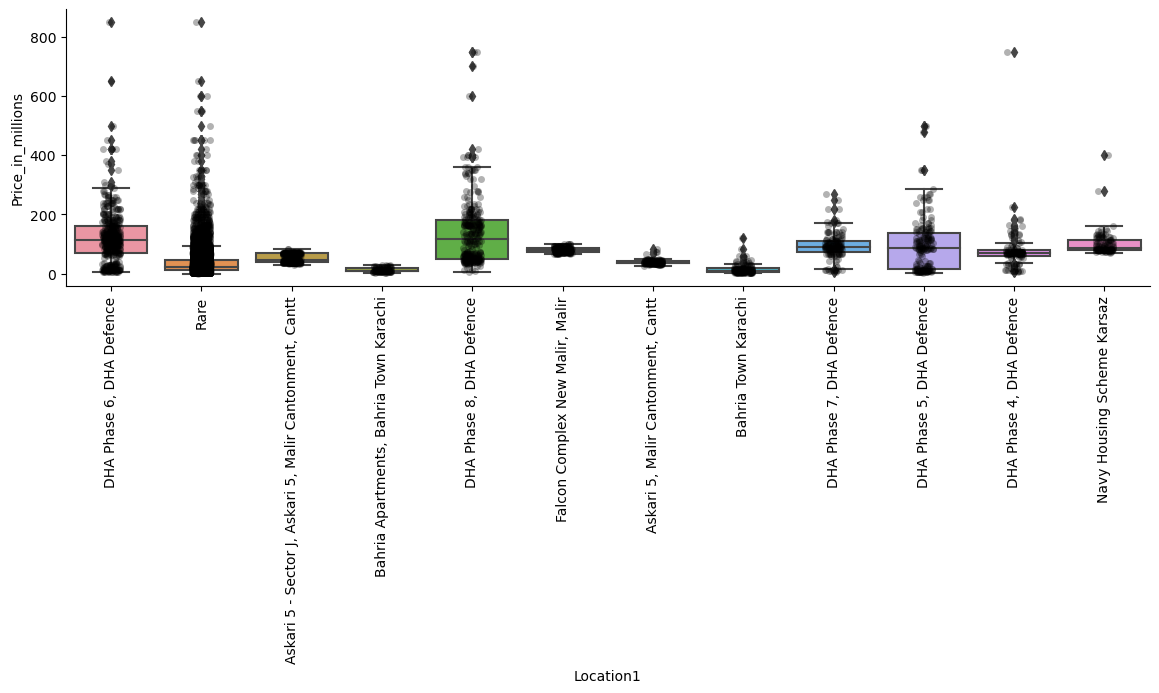

In [109]:
for var in ['Location1']:
    
    # make boxplot with Catplot
    plot = sns.catplot(x = var, y = 'Price_in_millions', data = data, kind = 'box', height = 3.5, aspect = 3.5)
    # add data points to boxplot with stripplot
    sns.stripplot(x = var, y = 'Price_in_millions', data = data, jitter = 0.1, alpha = 0.3, color = 'k')
    # rotate x-axis tick labels
    plot.set_xticklabels(rotation = 90)
    plt.show()

#### Mapping in 'Location1' variable

In [110]:
#data['Location1'].value_counts().index.tolist()

In [111]:
#data.loc[data['Location1'] == 'Rare']['Price_in_millions'].mean()

In [112]:
mean_dict = {}
for i in data['Location1'].value_counts().index.tolist():
    mean_dict[i] = data.loc[data['Location1'] == i]['Price_in_millions'].mean()
    
# Sort the dictionary by values in ascending order
sorted_dict = dict(sorted(mean_dict.items(), key = lambda item: item[1]))

print(sorted_dict)
print(len(sorted_dict))

{'Bahria Apartments, Bahria Town Karachi': 12.49495, 'Bahria Town Karachi': 15.27831, 'Rare': 35.880566, 'Askari 5, Malir Cantonment, Cantt': 39.195206, 'Askari 5 - Sector J, Askari 5, Malir Cantonment, Cantt': 52.34533, 'DHA Phase 4, DHA Defence': 77.289474, 'Falcon Complex New Malir, Malir': 80.799995, 'DHA Phase 7, DHA Defence': 94.32878, 'DHA Phase 5, DHA Defence': 97.40055, 'Navy Housing Scheme Karsaz': 101.00893, 'DHA Phase 6, DHA Defence': 121.81158, 'DHA Phase 8, DHA Defence': 139.14073}
12


In [113]:
#data

In [114]:
# re-map strings to numbers

location1_mappings = {'Missing': 0, 'NA': 0, 'NaN': 0, 
                      'Bahria Apartments, Bahria Town Karachi': 1,
                      'Bahria Town Karachi': 2,
                      'Rare': 3,
                      'Askari 5, Malir Cantonment, Cantt': 4,
                      'Askari 5 - Sector J, Askari 5, Malir Cantonment, Cantt': 5,
                      'DHA Phase 4, DHA Defence': 6,
                      'Falcon Complex New Malir, Malir': 7,
                      'DHA Phase 7, DHA Defence': 8,
                      'DHA Phase 5, DHA Defence': 9,
                      'Navy Housing Scheme Karsaz': 10,
                      'DHA Phase 6, DHA Defence': 11,
                      'DHA Phase 8, DHA Defence': 12
                     }

to_map_vars = ['Location1']

for var in to_map_vars:
    data[var] = data[var].map(location1_mappings)

In [115]:
#data.head()

## Saving DataFrame to CSV

#### Rearrange columns

In [116]:
data.columns

Index(['Location1', 'Type', 'Bedrooms', 'Bathrooms', 'Size_in_SqYds',
       'Price_in_millions', 'Parking_Spaces', 'Floors_in_Building',
       'Elevators', 'Lobby_in_Building', 'Double_Glazed_Windows',
       'Central_Air_Conditioning', 'Central_Heating', 'Waste_Disposal',
       'Furnished', 'Service_Elevators_in_Building', 'Flooring',
       'Electricity_Backup', 'Servant_Quarters', 'Study_Room', 'Prayer_Room',
       'Powder_Room', 'Gym', 'Lounge_or_Sitting_Room', 'Laundry_Room',
       'Business_Center_or_Media_Room_in_Building',
       'Satellite_or_Cable_TV_Ready', 'Broadband_Internet_Access', 'Intercom',
       'Conference_Room_in_Building', 'Community_Swimming_Pool',
       'Community_Lawn_or_Garden', 'Community_Gym', 'Community_Center',
       'First_Aid_or_Medical_Centre', 'Day_Care_center', 'Kids_Play_Area',
       'Mosque', 'Barbeque_Area', 'Lawn_or_Garden', 'Swimming_Pool', 'Sauna',
       'Jacuzzi', 'Nearby_Schools', 'Nearby_Hospital', 'Nearby_Shopping_Malls',
       'N

In [117]:
# Specify the desired column order
new_order = ['Location1', 'Type', 'Bedrooms', 'Bathrooms', 'Size_in_SqYds','log_Size_in_SqYds', 'Price_in_millions','log_price', 'Year', 'Yrs_SinceBlt', 
             'Parking_Spaces', 'Floors_in_Building', 'Elevators', 'Lobby_in_Building', 'Double_Glazed_Windows',
             'Central_Air_Conditioning', 'Central_Heating', 'Waste_Disposal', 'Furnished', 'Service_Elevators_in_Building', 
             'Flooring', 'Electricity_Backup', 'Servant_Quarters', 'Study_Room', 'Prayer_Room', 'Powder_Room', 'Gym', 
             'Lounge_or_Sitting_Room', 'Laundry_Room', 'Business_Center_or_Media_Room_in_Building', 'Satellite_or_Cable_TV_Ready', 
             'Broadband_Internet_Access', 'Intercom', 'Conference_Room_in_Building', 'Community_Swimming_Pool', 'Community_Lawn_or_Garden', 
             'Community_Gym', 'Community_Center', 'First_Aid_or_Medical_Centre', 'Day_Care_center', 'Kids_Play_Area', 'Mosque', 'Barbeque_Area', 
             'Lawn_or_Garden', 'Swimming_Pool', 'Sauna', 'Jacuzzi', 'Nearby_Schools', 'Nearby_Hospital', 'Nearby_Shopping_Malls', 
             'Nearby_Restaurants', 'Nearby_Public_Transport_Service', 'Other_Nearby_Places', 'Security_Staff', 'Maintainance_Staff',
             'Laundry_or_Dry_Cleaning_Facility', 'Facilities_for_Disabled', 
             'Bedrooms_na', 'Bathrooms_na', 'Size_in_SqYds_na', 'Floors_in_Building_na', 'Elevators_na', 'Year_na',
             ]



data = data[new_order]  # Rearrange the columns

#### Rename columns

In [118]:
# rename the columns
data.rename(columns = {'Location1': 'Location', 'Size_in_SqYds': 'SqYds', 'log_Size_in_SqYds': 'log_SqYds',
                     'Price_in_millions': 'Price', 'log_price': 'log_Price', 
                       'Year': 'Year', 'Parking_Spaces': 'Parking_Spaces',
                     'Floors_in_Building': 'Floors', 'Lobby_in_Building': 'Lobby', 'Double_Glazed_Windows': 'Double_Glazed_Windows',
                     'Central_Air_Conditioning': 'Central_AC', 'Service_Elevators_in_Building': 'Service_Elevators', 
                     'Business_Center_or_Media_Room_in_Building': 'Business_Center_or_Media_Room', 
                     'Satellite_or_Cable_TV_Ready': 'Satellite_or_Cable_TV_Ready', 'Broadband_Internet_Access': 'Internet',
                     'Conference_Room_in_Building': 'Conference_Room', 'Size_in_SqYds_na': 'SqYds_na', 'Floors_in_Building_na': 'Floors_na',
                     },
          inplace = True, errors = 'raise')

In [119]:
data.head()  # Print the DataFrame to verify the column order

,Location,Type,Bedrooms,Bathrooms,SqYds,log_SqYds,Price,log_Price,Year,Yrs_SinceBlt,Parking_Spaces,Floors,Elevators,Lobby,Double_Glazed_Windows,Central_AC,Central_Heating,Waste_Disposal,Furnished,Service_Elevators,Flooring,Electricity_Backup,Servant_Quarters,Study_Room,Prayer_Room,Powder_Room,Gym,Lounge_or_Sitting_Room,Laundry_Room,Business_Center_or_Media_Room,Satellite_or_Cable_TV_Ready,Internet,Intercom,Conference_Room,Community_Swimming_Pool,Community_Lawn_or_Garden,Community_Gym,Community_Center,First_Aid_or_Medical_Centre,Day_Care_center,Kids_Play_Area,Mosque,Barbeque_Area,Lawn_or_Garden,Swimming_Pool,Sauna,Jacuzzi,Nearby_Schools,Nearby_Hospital,Nearby_Shopping_Malls,Nearby_Restaurants,Nearby_Public_Transport_Service,Other_Nearby_Places,Security_Staff,Maintainance_Staff,Laundry_or_Dry_Cleaning_Facility,Facilities_for_Disabled,Bedrooms_na,Bathrooms_na,SqYds_na,Floors_na,Elevators_na,Year_na
0,11,2,6,6,600.0,6.396930,220.0,5.393628,2018,5,3,1,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
1,3,2,6,6,240.0,5.480639,38.5,3.650658,2018,5,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
2,3,1,2,2,106.0,4.663439,7.2,1.974081,2023,0,2,10,4,1,1,1,1,1,1,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,2,5,5,375.0,5.926926,72.5,4.283587,2022,1,4,1,0,0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,3,2,4,4,350.0,5.857933,21.1,3.049273,2018,5,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1


In [120]:
data.to_csv('../Data/data_cleaned_transformed.csv', index = False)

## 8. Feature Scaling

For use in linear models, features need to be either scaled. We will scale features to the minimum and maximum values:

In [121]:
# Let's separate into train and test set
# Remember to set the seed (random_state for this sklearn function)

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['SqYds', 'Price', 'log_Price', 'Year'], axis = 1), # predictive variables
    data['Price'], # target
    test_size = 0.1, # portion of dataset to allocate to test set
    random_state = 0, # we are setting the seed here
)

X_train.shape, X_test.shape

((8836, 59), (982, 59))

In [122]:
#X_train.head()

In [123]:
#X_test.head()

In [124]:
#y_train.head()

In [125]:
#y_train.head()

In [126]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [127]:
# #y_train after the log transformation
#y_train.head()

In [128]:
# #y_test after the log transformation
#y_test.head()

In [129]:
# create scaler
scaler = MinMaxScaler()

#  fit  the scaler to the train set
scaler.fit(X_train) 

# transform the train and test set

# sklearn returns numpy arrays, so we wrap the
# array with a pandas dataframe

X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

In [130]:
# let's now save the train and test sets for the next notebook!

X_train.to_csv('../Data/xtrain.csv', index = False)
X_test.to_csv('../Data/xtest.csv', index = False)

y_train.to_csv('../Data/ytrain.csv', index = False)
y_test.to_csv('../Data/ytest.csv', index = False)

## 9. Save Scaler

In [131]:
# now let's save the scaler

joblib.dump(scaler, '../Models/minmax_scaler.joblib') 

['../Models/minmax_scaler.joblib']

That Concludes Data Analysis and Feature Engineering

In [132]:
#data.head(3)